# Intro
#Author: Fatemeh Salehi
Email: fatemeh.salehihafshejni@fau.de & Fatmeh.salehi.h@gmail.com

Model Training and Evaluation Notebook

Paper: PRECISE-RA: Predicting Remission and
Stratifying Risk in Rheumatoid Arthritis Patients
Treated with bDMARDs—A Robust Machine
Learning Approach


"""

#conda activate RAproject

# libraries

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv
import datetime
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve 
#, CalibrationDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from utils import *
import torch
import wget
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import shap
import matplotlib.pyplot as plt
import shap
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

#matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import warnings


pd.set_option ('display.max_columns' , None)
pd.set_option ('display.max_columns' , 100)



/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Exploring

In [3]:
dataset =pd.read_csv('labeled_data.csv')

In [4]:
import pandas as pd

# Check for the unique values and count the occurrences of 1 and 0 in 'Conventional Synthetic DMARDs' column
counts = dataset['Conventional Synthetic DMARDs'].value_counts()

# Calculate percentages
percentages = (counts / len(dataset)) * 100

# Combine counts and percentages into one DataFrame
summary = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
})

print(summary)


                               Count  Percentage
Conventional Synthetic DMARDs                   
0.0                              909   86.406844
1.0                              143   13.593156


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

def generate_baseline_table(dataset, label_column='remission', categorical_columns=[]):
    # Separate the dataset into remission and non-remission groups
    remission_group = dataset[dataset[label_column] == 1]
    non_remission_group = dataset[dataset[label_column] == 0]
    
    # Initialize an empty list to store the table rows
    table = []
    
    # Calculate total counts for overall, remission, and non-remission groups
    overall_count = len(dataset)
    remission_count = len(remission_group)
    non_remission_count = len(non_remission_group)
    
    # Iterate over each column in the dataset
    for column in dataset.columns:
        if column == label_column:
            continue
        
        # Check if the column is categorical or numeric
        if column in categorical_columns:
            # Categorical columns will be skipped for now
            continue
        
        else:
            # Calculate mean and standard deviation for numeric variables
            overall_mean = np.mean(dataset[column])
            remission_mean = np.mean(remission_group[column])
            non_remission_mean = np.mean(non_remission_group[column])
            
            overall_std = np.std(dataset[column])
            remission_std = np.std(remission_group[column])
            non_remission_std = np.std(non_remission_group[column])
            
            # Perform t-test to calculate p-value
            _, p_value = ttest_ind(remission_group[column], non_remission_group[column], nan_policy='omit')
            
            # Format the mean and standard deviation into strings
            overall_str = f"{overall_mean:.2f} ({overall_std:.2f})"
            remission_str = f"{remission_mean:.2f} ({remission_std:.2f})"
            non_remission_str = f"{non_remission_mean:.2f} ({non_remission_std:.2f})"
            
            # Append the row to the table
            table.append([column, overall_str, remission_str, non_remission_str, f"{p_value:.3f}"])
    
    # Convert the list into a DataFrame for display
    table_df = pd.DataFrame(table, columns=[
        f'Characteristic',
        f'Overall (n={overall_count})',
        f'Remission (n={remission_count})',
        f'Non-Remission (n={non_remission_count})',
        'P-value'
    ])
    
    return table_df

# Example usage
baseline_table = generate_baseline_table(dataset, label_column='remission', categorical_columns=['Smoking Status', 'Gender'])

# Display the table
print(baseline_table)


                   Characteristic Overall (n=1052) Remission (n=520)  \
0                      Patient ID  526.50 (303.69)   536.24 (305.23)   
1                             Age    58.04 (12.95)     55.51 (13.34)   
2                    Visit Number      0.00 (0.00)       0.00 (0.00)   
3       Swollen Joint Count (SJC)      2.49 (2.68)       1.79 (2.53)   
4        Tender Joint Count (TJC)      3.57 (4.71)       2.07 (3.35)   
5                     DAS28 Score      3.31 (1.48)       2.60 (1.34)   
6                      CDAI Score     11.87 (9.78)       8.58 (8.72)   
7        VAS (Patient Assessment)    26.03 (19.09)     20.12 (17.37)   
8      VAS (Physician Assessment)    37.43 (23.37)     29.99 (21.66)   
9                             HAQ      0.96 (0.64)       0.75 (0.56)   
10                            ESR    19.45 (17.06)     14.34 (14.04)   
11                            CRP     8.53 (14.47)      6.75 (12.90)   
12              Rheumatoid Factor      1.44 (0.66)       1.45 (0

/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
baseline_table

Characteristic Overall (n=1052) Remission (n=520)  \
0                      Patient ID  526.50 (303.69)   536.24 (305.23)   
1                             Age    58.04 (12.95)     55.51 (13.34)   
2                    Visit Number      0.00 (0.00)       0.00 (0.00)   
3       Swollen Joint Count (SJC)      2.49 (2.68)       1.79 (2.53)   
4        Tender Joint Count (TJC)      3.57 (4.71)       2.07 (3.35)   
5                     DAS28 Score      3.31 (1.48)       2.60 (1.34)   
6                      CDAI Score     11.87 (9.78)       8.58 (8.72)   
7        VAS (Patient Assessment)    26.03 (19.09)     20.12 (17.37)   
8      VAS (Physician Assessment)    37.43 (23.37)     29.99 (21.66)   
9                             HAQ      0.96 (0.64)       0.75 (0.56)   
10                            ESR    19.45 (17.06)     14.34 (14.04)   
11                            CRP     8.53 (14.47)      6.75 (12.90)   
12              Rheumatoid Factor      1.44 (0.66)       1.45 (0.68)   
13                        RADAI-5      3.72 (2.21)       2.98 (2.06)   
14                         Weight    74.55 (15.40)     73.76 (15.24)   
15               Medication Group      1.58 (0.83)       1.61 (0.82)   
16                Dosage Interval      2.62 (1.75)       2.51 (1.63)   
17           Standard Single Dose  154.07 (292.38)   124.94 (251.36)   
18            Minimum Single Dose   69.18 (105.07)     60.17 (95.37)   
19            Maximum Single Dose  352.41 (568.79)   292.87 (489.01)   
20              Biological DMARDs      0.56 (0.50)       0.55 (0.50)   
21      Targeted Synthetic DMARDs      0.08 (0.27)       0.07 (0.25)   
22  Conventional Synthetic DMARDs      0.14 (0.34)       0.17 (0.37)   
23                      Rituximab      0.09 (0.28)       0.06 (0.23)   
24                  Sulfasalazine      0.00 (0.00)       0.00 (0.00)   
25                   visit_months      0.00 (0.00)       0.00 (0.00)   
26               Age of Diagnosis    48.43 (14.08)     46.12 (14.27)   
27                Age of Symptoms    46.21 (14.39)     44.20 (14.68)   
28                  effectiveness      0.65 (0.48)       1.00 (0.00)   

   Non-Remission (n=532) P-value  
0        516.98 (301.87)   0.304  
1          60.52 (12.04)   0.000  
2            0.00 (0.00)     nan  
3            3.17 (2.65)   0.000  
4            5.03 (5.34)   0.000  
5            4.00 (1.26)   0.000  
6           15.09 (9.69)   0.000  
7          31.79 (18.94)   0.000  
8          44.70 (22.69)   0.000  
9            1.17 (0.65)   0.000  
10         24.45 (18.23)   0.000  
11         10.27 (15.67)   0.000  
12           1.43 (0.63)   0.565  
13           4.45 (2.11)   0.000  
14         75.33 (15.51)   0.100  
15           1.56 (0.84)   0.335  
16           2.72 (1.86)   0.061  
17       182.54 (325.03)   0.001  
18        77.99 (113.06)   0.006  
19       410.60 (631.79)   0.001  
20           0.58 (0.49)   0.285  
21           0.09 (0.28)   0.163  
22           0.11 (0.31)   0.003  
23           0.11 (0.32)   0.001  
24           0.00 (0.00)     nan  
25           0.00 (0.00)     nan  
26         50.69 (13.51)   0.000  
27         48.17 (13.82)   0.000  
28           0.30 (0.46)   0.000

In [7]:
dataset_test=pd.read_csv('modified_dataset_Erlangen.csv')

In [8]:
dataset_test

tptID  Age_years  Gender  Osteoarthritis  Asthma  Uveitis  Hypertension  \
0       7.0       46.0     0.0             0.0     0.0      0.0           0.0   
1      21.0       60.0     1.0             0.0     0.0      0.0           0.0   
2     124.0       73.0     0.0             0.0     0.0      0.0           0.0   
3     159.0       81.0     0.0             0.0     0.0      0.0           0.0   
4     160.0       67.0     1.0             0.0     0.0      0.0           0.0   
..      ...        ...     ...             ...     ...      ...           ...   
149  4455.0       66.0     0.0             0.0     0.0      0.0           0.0   
150  4470.0       23.0     1.0             0.0     0.0      0.0           0.0   
151  4683.0       34.0     1.0             0.0     0.0      0.0           0.0   
152  4729.0       36.0     1.0             0.0     0.0      0.0           0.0   
153  5399.0       54.0     1.0             0.0     0.0      0.0           0.0   

     Chronic_renal_insufficiency  COPD  Depression  Diabetes  \
0                            0.0   0.0         0.0       0.0   
1                            0.0   0.0         0.0       0.0   
2                            0.0   0.0         0.0       0.0   
3                            0.0   0.0         0.0       0.0   
4                            0.0   0.0         0.0       0.0   
..                           ...   ...         ...       ...   
149                          0.0   0.0         0.0       0.0   
150                          0.0   0.0         0.0       0.0   
151                          0.0   0.0         0.0       0.0   
152                          0.0   0.0         0.0       0.0   
153                          0.0   0.0         0.0       0.0   

     Inflammatory_bowel_disease  Fat_metabolism_disorder  Gout  Heart_attack  \
0                           0.0                      0.0   0.0           0.0   
1                           0.0                      0.0   0.0           0.0   
2                           0.0                      0.0   0.0           0.0   
3                           0.0                      0.0   0.0           0.0   
4                           0.0                      0.0   0.0           0.0   
..                          ...                      ...   ...           ...   
149                         0.0                      0.0   0.0           0.0   
150                         0.0                      0.0   0.0           0.0   
151                         0.0                      0.0   0.0           0.0   
152                         0.0                      0.0   0.0           0.0   
153                         0.0                      0.0   0.0           0.0   

     Coronary_heart_disease  Osteoporosis  Periodontitis  Thyroid_disease  \
0                       0.0           0.0            0.0              0.0   
1                       0.0           0.0            0.0              0.0   
2                       0.0           0.0            0.0              0.0   
3                       0.0           0.0            0.0              0.0   
4                       0.0           0.0            0.0              0.0   
..                      ...           ...            ...              ...   
149                     0.0           0.0            0.0              0.0   
150                     0.0           0.0            0.0              0.0   
151                     0.0           0.0            0.0              0.0   
152                     0.0           0.0            0.0              0.0   
153                     0.0           0.0            0.0              0.0   

     Thrombosis      SJC28     TJC28  VAS_activity_physician  \
0           0.0   1.000000  0.000000                0.000000   
1           0.0   0.000000  0.000000                6.000000   
2           0.0   0.000000  2.000000               60.000000   
3           0.0   0.000000  0.000000               29.350443   
4           0.0   2.000000  6.000000               39.1896

In [9]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table between 'RF_' and 'remission'
contingency_table = pd.crosstab(dataset['Rheumatoid Factor'], dataset['remission'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"P-value: {p_value}")

P-value: 0.17037728381377437


In [10]:
baseline_table = generate_baseline_table(dataset_test, label_column='remission', categorical_columns=[])



/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
baseline_table

Characteristic    Overall (n=154)   Remission (n=77)  \
0                         tptID  1559.82 (1205.38)  1599.21 (1238.72)   
1                     Age_years      53.47 (13.28)      50.97 (14.13)   
2                        Gender        0.73 (0.45)        0.66 (0.47)   
3                Osteoarthritis        0.00 (0.00)        0.00 (0.00)   
4                        Asthma        0.00 (0.00)        0.00 (0.00)   
5                       Uveitis        0.00 (0.00)        0.00 (0.00)   
6                  Hypertension        0.00 (0.00)        0.00 (0.00)   
7   Chronic_renal_insufficiency        0.00 (0.00)        0.00 (0.00)   
8                          COPD        0.00 (0.00)        0.00 (0.00)   
9                    Depression        0.00 (0.00)        0.00 (0.00)   
10                     Diabetes        0.00 (0.00)        0.00 (0.00)   
11   Inflammatory_bowel_disease        0.00 (0.00)        0.00 (0.00)   
12      Fat_metabolism_disorder        0.00 (0.00)        0.00 (0.00)   
13                         Gout        0.00 (0.00)        0.00 (0.00)   
14                 Heart_attack        0.00 (0.00)        0.00 (0.00)   
15       Coronary_heart_disease        0.00 (0.00)        0.00 (0.00)   
16                 Osteoporosis        0.00 (0.00)        0.00 (0.00)   
17                Periodontitis        0.00 (0.00)        0.00 (0.00)   
18              Thyroid_disease        0.00 (0.00)        0.00 (0.00)   
19                   Thrombosis        0.00 (0.00)        0.00 (0.00)   
20                        SJC28        2.31 (4.12)        1.49 (3.44)   
21                        TJC28        3.36 (5.08)        1.37 (2.90)   
22       VAS_activity_physician      19.17 (19.80)       8.98 (10.50)   
23         VAS_activity_patient      32.34 (25.46)      17.97 (18.50)   
24                     VAS_pain      27.84 (23.14)      17.63 (18.43)   
25                    HAQ_Score        0.90 (0.76)        0.59 (0.65)   
26               DAS28ESR_Score        3.10 (1.45)        2.24 (1.07)   
27               DAS28CRP_Score        2.94 (1.26)        2.27 (0.91)   
28                   CDAI_Score       9.36 (10.25)        4.45 (5.87)   
29                   SDAI_Score      10.25 (10.39)        5.53 (6.89)   
30                       ESR_mm      17.21 (16.47)       11.49 (9.32)   
31                     CRP_mg_l        0.35 (0.48)        0.29 (0.45)   
32                           RF     98.58 (191.70)     58.12 (103.47)   
33                          CCP    237.74 (403.15)    190.68 (308.75)   
34                       bDMARD        1.00 (0.00)        1.00 (0.00)   
35                      tsDMARD        0.00 (0.00)        0.00 (0.00)   
36              tsDMARD_dose_mg        0.00 (0.00)        0.00 (0.00)   
37             tsDMARD_interval        0.00 (0.00)        0.00 (0.00)   
38                      csDMARD        0.67 (0.47)        0.69 (0.46)   
39                 Prednisolone        0.38 (0.49)        0.27 (0.45)   
40                        NSAID        0.28 (0.45)        0.30 (0.46)   
41                          COX        0.05 (0.21)        0.05 (0.22)   
42  bDMARD_intake_duration_days      84.58 (41.46)      86.87 (44.10)   
43                  DateDiff_NM        0.00 (0.00)        0.00 (0.00)   
44                         RF_b        0.97 (0.16)        0.95 (0.22)   
45                        CCP_b        0.69 (0.46)        0.64 (0.48)   
46                          BMI      27.94 (14.16)      28.58 (19.19)   
47                        index  4680.58 (2310.53)  4729.09 (2270.73)   
48                effectiveness        0.64 (0.48)        1.00 (0.00)   
49                    sustained        0.44 (0.50)        0.87 (0.34)   

   Non-Remission (n=77) P-value  
0     1520.44 (1169.76)   0.687  
1         55.96 (11.86)   0.020  
2           0.79 (0.41)   0.071  
3           0.00 (0.00)     nan  
4           0.00 (0.00)     nan  
5           0.00 (0.00)     nan  
6           0.00 (0.00)     nan  
7           0.00 (0.0

In [12]:
dataset_test =pd.read_csv('modified_dataset_Erlangen.csv')

In [13]:
dataset_test.drop(columns=['bDMARD_intake_duration_days', 'DateDiff_NM', 'RF',
       'CCP_b', 'index','effectiveness', 'sustained'], axis=1,inplace=True)

In [14]:
dataset_test.columns

Index(['tptID', 'Age_years', 'Gender', 'Osteoarthritis', 'Asthma', 'Uveitis',
       'Hypertension', 'Chronic_renal_insufficiency', 'COPD', 'Depression',
       'Diabetes', 'Inflammatory_bowel_disease', 'Fat_metabolism_disorder',
       'Gout', 'Heart_attack', 'Coronary_heart_disease', 'Osteoporosis',
       'Periodontitis', 'Thyroid_disease', 'Thrombosis', 'SJC28', 'TJC28',
       'VAS_activity_physician', 'VAS_activity_patient', 'VAS_pain',
       'HAQ_Score', 'DAS28ESR_Score', 'DAS28CRP_Score', 'CDAI_Score',
       'SDAI_Score', 'ESR_mm', 'CRP_mg_l', 'CCP', 'bDMARD', 'tsDMARD',
       'tsDMARD_dose_mg', 'tsDMARD_interval', 'csDMARD', 'Prednisolone',
       'NSAID', 'COX', 'RF_b', 'BMI', 'remission'],
      dtype='object')

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Feature mapping between training and unseen dataset
feature_mapping = {
    'Age_years': 'Age',
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'DAS28ESR_Score': 'DAS28 Score',
    'CRP_mg_l': 'CRP',
    'RF_b': 'Rheumatoid Factor',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'HAQ_Score': 'HAQ',
}

# Ensure that the target variables are not included in the features
target = ['effectiveness', 'remission']
features = dataset.columns.difference(target + ['Patient ID'])

# Subset the training dataset
X_train = dataset[features].copy()
y_train = dataset['remission'].copy()

# Map dataset_test features to training dataset features
mapped_features = {v: k for k, v in feature_mapping.items() if v in features}
test_columns = [mapped_features.get(col, col) for col in dataset_test.columns if col in mapped_features]

# Ensure X_test is aligned with the training features
X_test = dataset_test[test_columns]

# Convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test_true = dataset_test['remission'].to_numpy()  # Actual labels in the test set


In [16]:
y_unseen_true = dataset_test['remission'].to_numpy()


In [17]:
dataset_test.columns

Index(['tptID', 'Age_years', 'Gender', 'Osteoarthritis', 'Asthma', 'Uveitis',
       'Hypertension', 'Chronic_renal_insufficiency', 'COPD', 'Depression',
       'Diabetes', 'Inflammatory_bowel_disease', 'Fat_metabolism_disorder',
       'Gout', 'Heart_attack', 'Coronary_heart_disease', 'Osteoporosis',
       'Periodontitis', 'Thyroid_disease', 'Thrombosis', 'SJC28', 'TJC28',
       'VAS_activity_physician', 'VAS_activity_patient', 'VAS_pain',
       'HAQ_Score', 'DAS28ESR_Score', 'DAS28CRP_Score', 'CDAI_Score',
       'SDAI_Score', 'ESR_mm', 'CRP_mg_l', 'CCP', 'bDMARD', 'tsDMARD',
       'tsDMARD_dose_mg', 'tsDMARD_interval', 'csDMARD', 'Prednisolone',
       'NSAID', 'COX', 'RF_b', 'BMI', 'remission'],
      dtype='object')

In [18]:
# Updated Feature mapping between training and test datasets
feature_mapping = {
    'tptID':'Patient ID',
    'Age_years': 'Age',
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'DAS28ESR_Score': 'DAS28 Score',
    'CRP_mg_l': 'CRP',
    'RF_b': 'Rheumatoid Factor',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'HAQ_Score': 'HAQ',
    'CDAI_Score': 'CDAI Score',
    'ESR_mm': 'ESR',
    'BMI':'Weight'
}

# Rename the columns in the dataset_test DataFrame
dataset_test.rename(columns=feature_mapping, inplace=True)

# Display the renamed columns to verify
print(dataset_test.columns)


Index(['Patient ID', 'Age', 'Gender', 'Osteoarthritis', 'Asthma', 'Uveitis',
       'Hypertension', 'Chronic_renal_insufficiency', 'COPD', 'Depression',
       'Diabetes', 'Inflammatory_bowel_disease', 'Fat_metabolism_disorder',
       'Gout', 'Heart_attack', 'Coronary_heart_disease', 'Osteoporosis',
       'Periodontitis', 'Thyroid_disease', 'Thrombosis',
       'Swollen Joint Count (SJC)', 'Tender Joint Count (TJC)',
       'VAS (Physician Assessment)', 'VAS (Patient Assessment)', 'VAS_pain',
       'HAQ', 'DAS28 Score', 'DAS28CRP_Score', 'CDAI Score', 'SDAI_Score',
       'ESR', 'CRP', 'CCP', 'bDMARD', 'tsDMARD', 'tsDMARD_dose_mg',
       'tsDMARD_interval', 'csDMARD', 'Prednisolone', 'NSAID', 'COX',
       'Rheumatoid Factor', 'Weight', 'remission'],
      dtype='object')


In [19]:
dataset.drop(columns=['Patient ID', 'Visit Number',
       'Dosage Interval', 'Standard Single Dose', 'Minimum Single Dose',
       'Maximum Single Dose', 'Biological DMARDs', 'Targeted Synthetic DMARDs', 'Rituximab', 'Sulfasalazine',
       'visit_months', 'Smoking Status','effectiveness','RADAI-5', 'Age of Diagnosis', 'Age of Symptoms',
],axis=1,inplace=True)

test on erlangen dataset

In [20]:
dataset.columns

Index(['Age', 'Swollen Joint Count (SJC)', 'Tender Joint Count (TJC)',
       'DAS28 Score', 'CDAI Score', 'VAS (Patient Assessment)',
       'VAS (Physician Assessment)', 'HAQ', 'ESR', 'CRP', 'Rheumatoid Factor',
       'Weight', 'Medication Group', 'Conventional Synthetic DMARDs',
       'remission'],
      dtype='object')

In [21]:
dataset['Rheumatoid Factor'] = dataset['Rheumatoid Factor'].replace(3, 0)
dataset['Rheumatoid Factor'] = dataset['Rheumatoid Factor'].replace(2, 0)



In [22]:
baseline_table

Characteristic    Overall (n=154)   Remission (n=77)  \
0                         tptID  1559.82 (1205.38)  1599.21 (1238.72)   
1                     Age_years      53.47 (13.28)      50.97 (14.13)   
2                        Gender        0.73 (0.45)        0.66 (0.47)   
3                Osteoarthritis        0.00 (0.00)        0.00 (0.00)   
4                        Asthma        0.00 (0.00)        0.00 (0.00)   
5                       Uveitis        0.00 (0.00)        0.00 (0.00)   
6                  Hypertension        0.00 (0.00)        0.00 (0.00)   
7   Chronic_renal_insufficiency        0.00 (0.00)        0.00 (0.00)   
8                          COPD        0.00 (0.00)        0.00 (0.00)   
9                    Depression        0.00 (0.00)        0.00 (0.00)   
10                     Diabetes        0.00 (0.00)        0.00 (0.00)   
11   Inflammatory_bowel_disease        0.00 (0.00)        0.00 (0.00)   
12      Fat_metabolism_disorder        0.00 (0.00)        0.00 (0.00)   
13                         Gout        0.00 (0.00)        0.00 (0.00)   
14                 Heart_attack        0.00 (0.00)        0.00 (0.00)   
15       Coronary_heart_disease        0.00 (0.00)        0.00 (0.00)   
16                 Osteoporosis        0.00 (0.00)        0.00 (0.00)   
17                Periodontitis        0.00 (0.00)        0.00 (0.00)   
18              Thyroid_disease        0.00 (0.00)        0.00 (0.00)   
19                   Thrombosis        0.00 (0.00)        0.00 (0.00)   
20                        SJC28        2.31 (4.12)        1.49 (3.44)   
21                        TJC28        3.36 (5.08)        1.37 (2.90)   
22       VAS_activity_physician      19.17 (19.80)       8.98 (10.50)   
23         VAS_activity_patient      32.34 (25.46)      17.97 (18.50)   
24                     VAS_pain      27.84 (23.14)      17.63 (18.43)   
25                    HAQ_Score        0.90 (0.76)        0.59 (0.65)   
26               DAS28ESR_Score        3.10 (1.45)        2.24 (1.07)   
27               DAS28CRP_Score        2.94 (1.26)        2.27 (0.91)   
28                   CDAI_Score       9.36 (10.25)        4.45 (5.87)   
29                   SDAI_Score      10.25 (10.39)        5.53 (6.89)   
30                       ESR_mm      17.21 (16.47)       11.49 (9.32)   
31                     CRP_mg_l        0.35 (0.48)        0.29 (0.45)   
32                           RF     98.58 (191.70)     58.12 (103.47)   
33                          CCP    237.74 (403.15)    190.68 (308.75)   
34                       bDMARD        1.00 (0.00)        1.00 (0.00)   
35                      tsDMARD        0.00 (0.00)        0.00 (0.00)   
36              tsDMARD_dose_mg        0.00 (0.00)        0.00 (0.00)   
37             tsDMARD_interval        0.00 (0.00)        0.00 (0.00)   
38                      csDMARD        0.67 (0.47)        0.69 (0.46)   
39                 Prednisolone        0.38 (0.49)        0.27 (0.45)   
40                        NSAID        0.28 (0.45)        0.30 (0.46)   
41                          COX        0.05 (0.21)        0.05 (0.22)   
42  bDMARD_intake_duration_days      84.58 (41.46)      86.87 (44.10)   
43                  DateDiff_NM        0.00 (0.00)        0.00 (0.00)   
44                         RF_b        0.97 (0.16)        0.95 (0.22)   
45                        CCP_b        0.69 (0.46)        0.64 (0.48)   
46                          BMI      27.94 (14.16)      28.58 (19.19)   
47                        index  4680.58 (2310.53)  4729.09 (2270.73)   
48                effectiveness        0.64 (0.48)        1.00 (0.00)   
49                    sustained        0.44 (0.50)        0.87 (0.34)   

   Non-Remission (n=77) P-value  
0     1520.44 (1169.76)   0.687  
1         55.96 (11.86)   0.020  
2           0.79 (0.41)   0.071  
3           0.00 (0.00)     nan  
4           0.00 (0.00)     nan  
5           0.00 (0.00)     nan  
6           0.00 (0.00)     nan  
7           0.00 (0.0

In [23]:
dataset_test

Patient ID   Age  Gender  Osteoarthritis  Asthma  Uveitis  Hypertension  \
0           7.0  46.0     0.0             0.0     0.0      0.0           0.0   
1          21.0  60.0     1.0             0.0     0.0      0.0           0.0   
2         124.0  73.0     0.0             0.0     0.0      0.0           0.0   
3         159.0  81.0     0.0             0.0     0.0      0.0           0.0   
4         160.0  67.0     1.0             0.0     0.0      0.0           0.0   
..          ...   ...     ...             ...     ...      ...           ...   
149      4455.0  66.0     0.0             0.0     0.0      0.0           0.0   
150      4470.0  23.0     1.0             0.0     0.0      0.0           0.0   
151      4683.0  34.0     1.0             0.0     0.0      0.0           0.0   
152      4729.0  36.0     1.0             0.0     0.0      0.0           0.0   
153      5399.0  54.0     1.0             0.0     0.0      0.0           0.0   

     Chronic_renal_insufficiency  COPD  Depression  Diabetes  \
0                            0.0   0.0         0.0       0.0   
1                            0.0   0.0         0.0       0.0   
2                            0.0   0.0         0.0       0.0   
3                            0.0   0.0         0.0       0.0   
4                            0.0   0.0         0.0       0.0   
..                           ...   ...         ...       ...   
149                          0.0   0.0         0.0       0.0   
150                          0.0   0.0         0.0       0.0   
151                          0.0   0.0         0.0       0.0   
152                          0.0   0.0         0.0       0.0   
153                          0.0   0.0         0.0       0.0   

     Inflammatory_bowel_disease  Fat_metabolism_disorder  Gout  Heart_attack  \
0                           0.0                      0.0   0.0           0.0   
1                           0.0                      0.0   0.0           0.0   
2                           0.0                      0.0   0.0           0.0   
3                           0.0                      0.0   0.0           0.0   
4                           0.0                      0.0   0.0           0.0   
..                          ...                      ...   ...           ...   
149                         0.0                      0.0   0.0           0.0   
150                         0.0                      0.0   0.0           0.0   
151                         0.0                      0.0   0.0           0.0   
152                         0.0                      0.0   0.0           0.0   
153                         0.0                      0.0   0.0           0.0   

     Coronary_heart_disease  Osteoporosis  Periodontitis  Thyroid_disease  \
0                       0.0           0.0            0.0              0.0   
1                       0.0           0.0            0.0              0.0   
2                       0.0           0.0            0.0              0.0   
3                       0.0           0.0            0.0              0.0   
4                       0.0           0.0            0.0              0.0   
..                      ...           ...            ...              ...   
149                     0.0           0.0            0.0              0.0   
150                     0.0           0.0            0.0              0.0   
151                     0.0           0.0            0.0              0.0   
152                     0.0           0.0            0.0              0.0   
153                     0.0           0.0            0.0              0.0   

     Thrombosis  Swollen Joint Count (SJC)  Tender Joint Count (TJC)  \
0           0.0                   1.000000                  0.000000   
1           0.0                   0.000000                  0.000000   
2           0.0                   0.000000                  2.000000   
3           0.0                   0.000000                  0.000000   
4           0.0              

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

# Define a function to compute p-values for each variable
def compute_p_values(df, label_column):
    p_values = []
    variable_names = []
    
    for col in df.columns:
        if col != label_column:
            # Check if the column is categorical (e.g., contains less than 10 unique values)
            if df[col].nunique() < 10:  
                # Perform Chi-Square test for categorical variables
                contingency_table = pd.crosstab(df[col], df[label_column])
                _, p_value, _, _ = chi2_contingency(contingency_table)
                p_values.append(p_value)
            else:
                # For continuous variables, perform t-test or Mann-Whitney U test
                group1 = df[df[label_column] == 1][col]
                group2 = df[df[label_column] == 0][col]
                
                # Check for normality (basic method, adjust as needed)
                if group1.var() == 0 or group2.var() == 0:
                    p_value = None
                else:
                    try:
                        # Perform t-test
                        _, p_value = ttest_ind(group1, group2)
                    except ValueError:
                        # If normality assumption is violated, use Mann-Whitney U test
                        _, p_value = mannwhitneyu(group1, group2)

                p_values.append(p_value)
            
            variable_names.append(col)
    
    # Create a DataFrame with variable names and their p-values
    p_value_table = pd.DataFrame({'Variable': variable_names, 'P-Value': p_values})
    
    return p_value_table

p_value_table = compute_p_values(dataset, label_column='remission')

# Display the p-value table
p_value_table.head(30)


Variable       P-Value
0                             Age  2.662433e-10
1       Swollen Joint Count (SJC)  3.814085e-17
2        Tender Joint Count (TJC)  1.218303e-25
3                     DAS28 Score  7.797500e-61
4                      CDAI Score  1.249007e-28
5        VAS (Patient Assessment)  3.484778e-24
6      VAS (Physician Assessment)  1.298859e-25
7                             HAQ  6.486622e-27
8                             ESR  9.356036e-23
9                             CRP  7.970591e-05
10              Rheumatoid Factor  9.065961e-01
11                         Weight  1.002472e-01
12               Medication Group  1.248451e-02
13  Conventional Synthetic DMARDs  4.430259e-03

In [26]:
bioreg_data= dataset.copy()
erlangen_data= dataset_test.copy()

# Classification

In [28]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

#matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [27]:
data_classifier=pd.DataFrame(columns=['Classifier','Accuracy','AUC-ROC','F1 score', 'MCC'])


# ADAboost

Train your AdaBoost model with cross-validation and collect predicted probabilities.
Calibrate the model using internal validation (using cross-validated probabilities).
Evaluate calibration on the internal validation set (with calibration curves and metrics).
Validate the calibrated model on the external test set (external validation).

Selected Features using RFE: ['DAS28 Score', 'Rheumatoid Factor', 'VAS (Physician Assessment)', 'Age', 'Tender Joint Count (TJC)', 'Swollen Joint Count (SJC)', 'Conventional Synthetic DMARDs', 'Weight', 'CDAI Score', 'VAS (Patient Assessment)', 'CRP', 'HAQ', 'ESR']
Accuracy: 0.838
Precision: 0.871
Recall: 0.792
F1 Score: 0.830
MCC: 0.678
AUC ROC: 0.872


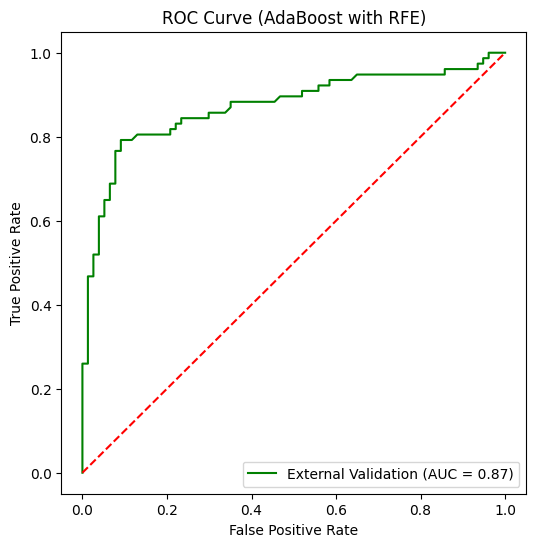

100%|██████████| 154/154 [02:16<00:00,  1.13it/s]


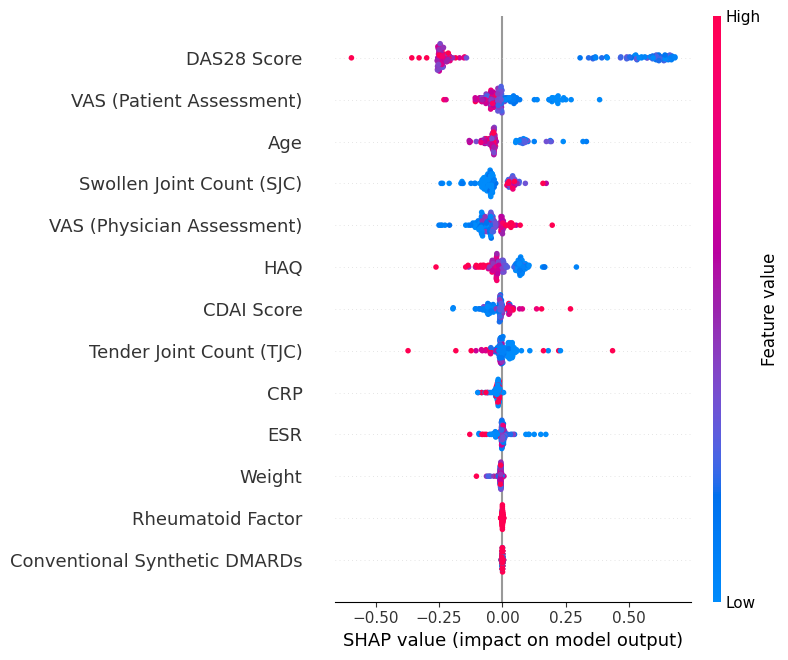

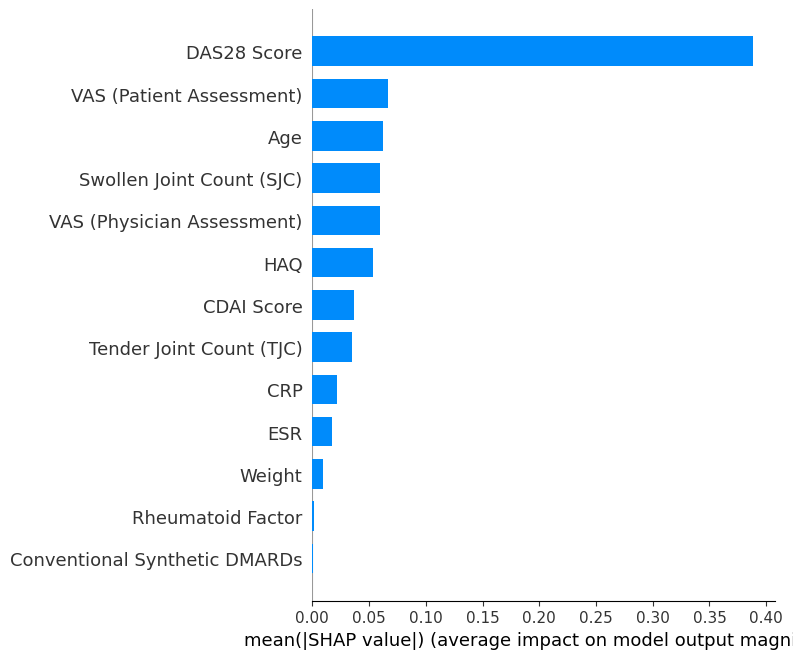

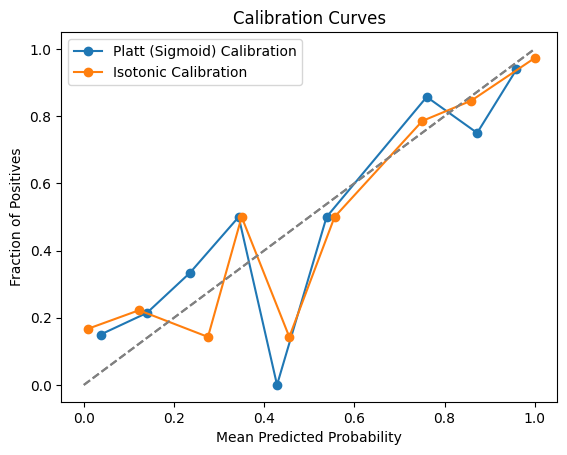

In [125]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, brier_score_loss, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
from betacal import BetaCalibration
import shap
import warnings

# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score', 
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1)
y_train = dataset['remission']

X_test = dataset_test_renamed.drop(['remission'], axis=1)
y_test = dataset_test_renamed['remission']

# Step 4: Recursive Feature Elimination (RFE) for feature selection using Random Forest
K = 14  # Number of top features to select
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=K, step=1)
rfe.fit(X_train, y_train)

selected_feature_indices = rfe.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

X_train_rfe = X_train.iloc[:, selected_feature_indices]
X_test_rfe = X_test.iloc[:, selected_feature_indices]

print("Selected Features using RFE:", list(selected_feature_names))

# Step 5: Train AdaBoost on the selected features
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
ada_model.fit(X_train_rfe, y_train)

# Step 6: Evaluate performance on the test set
y_pred_test = ada_model.predict(X_test_rfe)
y_pred_proba_test = ada_model.predict_proba(X_test_rfe)[:, 1]

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
mcc = matthews_corrcoef(y_test, y_pred_test)

# Compute ROC curve and AUC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")
print(f"AUC ROC: {roc_auc_test:.3f}")

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_test, tpr_test, label=f'External Validation (AUC = {roc_auc_test:.2f})', color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AdaBoost with RFE)')
plt.legend(loc="lower right")
plt.show()

# Step 7: SHAP analysis for interpretability
explainer = shap.KernelExplainer(ada_model.predict, X_train_rfe.sample(50))
shap_values = explainer.shap_values(X_test_rfe)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test_rfe, feature_names=selected_feature_names)

# SHAP Feature Importance Plot
shap.summary_plot(shap_values, X_test_rfe, feature_names=selected_feature_names, plot_type='bar')
# Step 8: Calibration methods
calibration_methods = {
    "Platt (Sigmoid)": CalibratedClassifierCV(ada_model, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(ada_model, method='isotonic', cv='prefit')
}

# Fit calibration models
for name, model in calibration_methods.items():
    model.fit(X_train_rfe, y_train)

# Step 9: Calibration Curves
for name, model in calibration_methods.items():
    y_pred_calibrated = model.predict_proba(X_test_rfe)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_pred_calibrated, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f"{name} Calibration")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend(loc="best")
plt.show()


In [126]:
plt.figure()
shap.summary_plot(shap_values, X_test_rfe, feature_names=selected_feature_names, show=False)
plt.title('SHAP Summary Plot', fontsize=14)
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')  # Save the SHAP summary plot
plt.close()  # Close the figure to prevent it from displaying

# SHAP Feature Importance Plot
plt.figure()
shap.summary_plot(shap_values, X_test_rfe, feature_names=selected_feature_names, plot_type='bar', show=False)
plt.title('SHAP Feature Importance Plot', fontsize=14)
plt.savefig('shap_feature_importance_plot.png', dpi=300, bbox_inches='tight')  # Save the SHAP feature importance plot
plt.close()

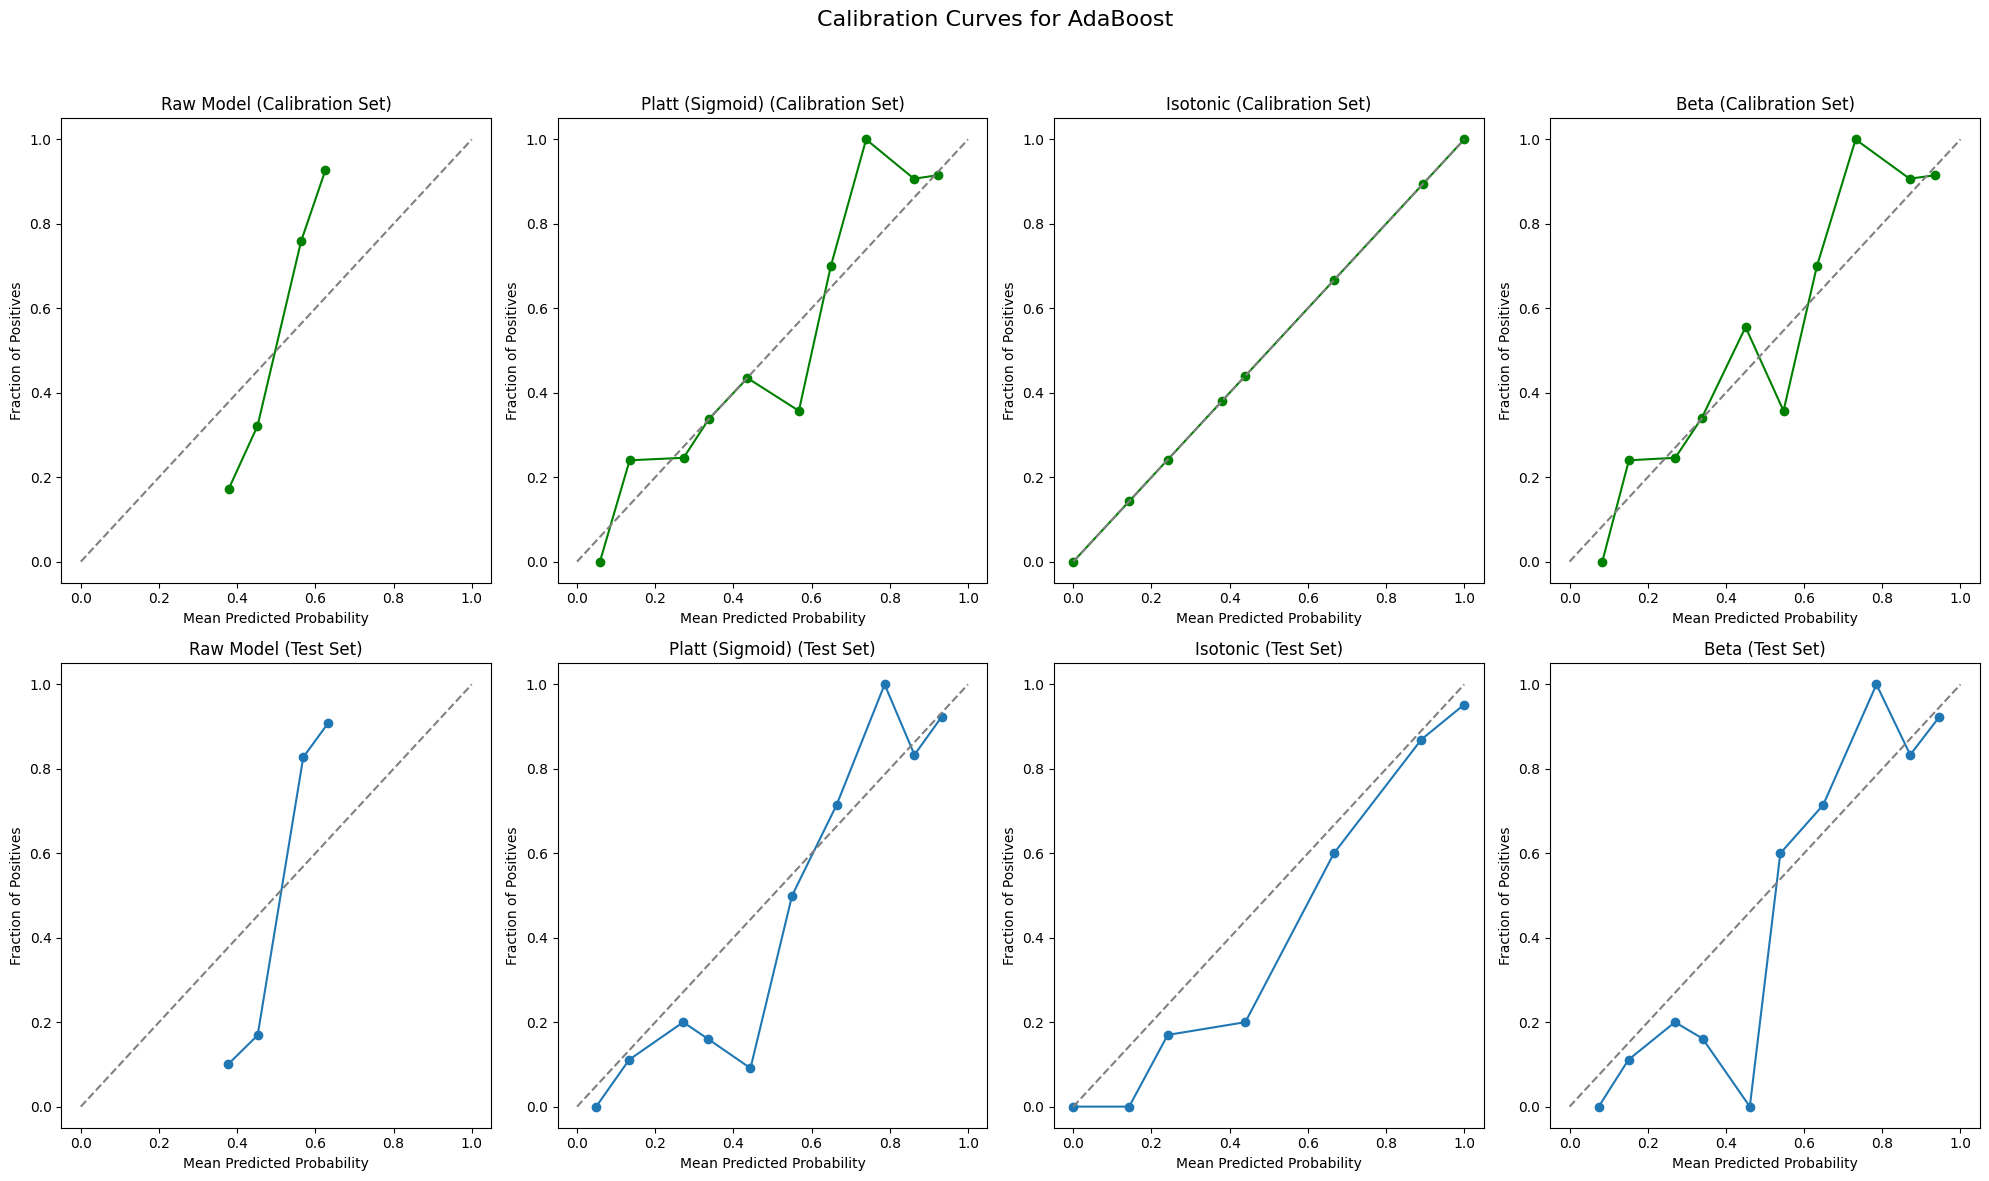

Model  Accuracy  Precision    Recall  F1 Score  \
0      Raw (Before Calibration)  0.857143   0.876712  0.831169  0.853333   
1  Calibrated (Platt (Sigmoid))  0.844156   0.844156  0.844156  0.844156   
2         Calibrated (Isotonic)  0.850649   0.875000  0.818182  0.845638   
3             Calibrated (Beta)  0.850649   0.855263  0.844156  0.849673   

        MCC  Brier Score   AUC-ROC  
0  0.715251     0.197258  0.868865  
1  0.688312     0.138065  0.868865  
2  0.702782     0.134554  0.874178  
3  0.701358     0.136799  0.868865

In [88]:
def plot_calibration_curves(models_dict, X_calib, y_calib, X_test, y_test):
    """
    Plots calibration curves for raw and calibrated models on both calibration and test sets.
    """
    fig, ax = plt.subplots(2, len(models_dict) + 1, figsize=(20, 12))
    fig.suptitle("Calibration Curves for AdaBoost", fontsize=16)

    # Row 1: Calibration Set
    prob_true_raw_calib, prob_pred_raw_calib = calibration_curve(y_calib, best_model_ada.predict_proba(X_calib)[:, 1], n_bins=10)
    ax[0, 0].plot(prob_pred_raw_calib, prob_true_raw_calib, marker='o', label="Raw Model", color='green')
    ax[0, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[0, 0].set_title("Raw Model (Calibration Set)")
    ax[0, 0].set_xlabel("Mean Predicted Probability")
    ax[0, 0].set_ylabel("Fraction of Positives")

    # Row 2: Test Set
    prob_true_raw_test, prob_pred_raw_test = calibration_curve(y_test, best_model_ada.predict_proba(X_test)[:, 1], n_bins=10)
    ax[1, 0].plot(prob_pred_raw_test, prob_true_raw_test, marker='o', label="Raw Model")
    ax[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[1, 0].set_title("Raw Model (Test Set)")
    ax[1, 0].set_xlabel("Mean Predicted Probability")
    ax[1, 0].set_ylabel("Fraction of Positives")

    # Calibrated Models
    for i, (name, model) in enumerate(models_dict.items()):
        # Calibration Set
        prob_pred_calib = model.predict_proba(X_calib)[:, 1]
        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        ax[0, i + 1].plot(prob_pred_calib, prob_true_calib, marker='o', label=f"{name}",color='green')
        ax[0, i + 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[0, i + 1].set_title(f"{name} (Calibration Set)")
        ax[0, i + 1].set_xlabel("Mean Predicted Probability")
        ax[0, i + 1].set_ylabel("Fraction of Positives")

        # Test Set
        prob_pred_test = model.predict_proba(X_test)[:, 1]
        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)
        ax[1, i + 1].plot(prob_pred_test, prob_true_test, marker='o', label=f"{name}")
        ax[1, i + 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[1, i + 1].set_title(f"{name} (Test Set)")
        ax[1, i + 1].set_xlabel("Mean Predicted Probability")
        ax[1, i + 1].set_ylabel("Fraction of Positives")

    # Adjust layout and save the figure
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
    plt.savefig("enhanced_calibration_curves_adaboost.png", dpi=300)
    plt.show()

# Call the function
plot_calibration_curves(calibration_methods, X_calib, y_calib, X_test, y_test)
metrics_df

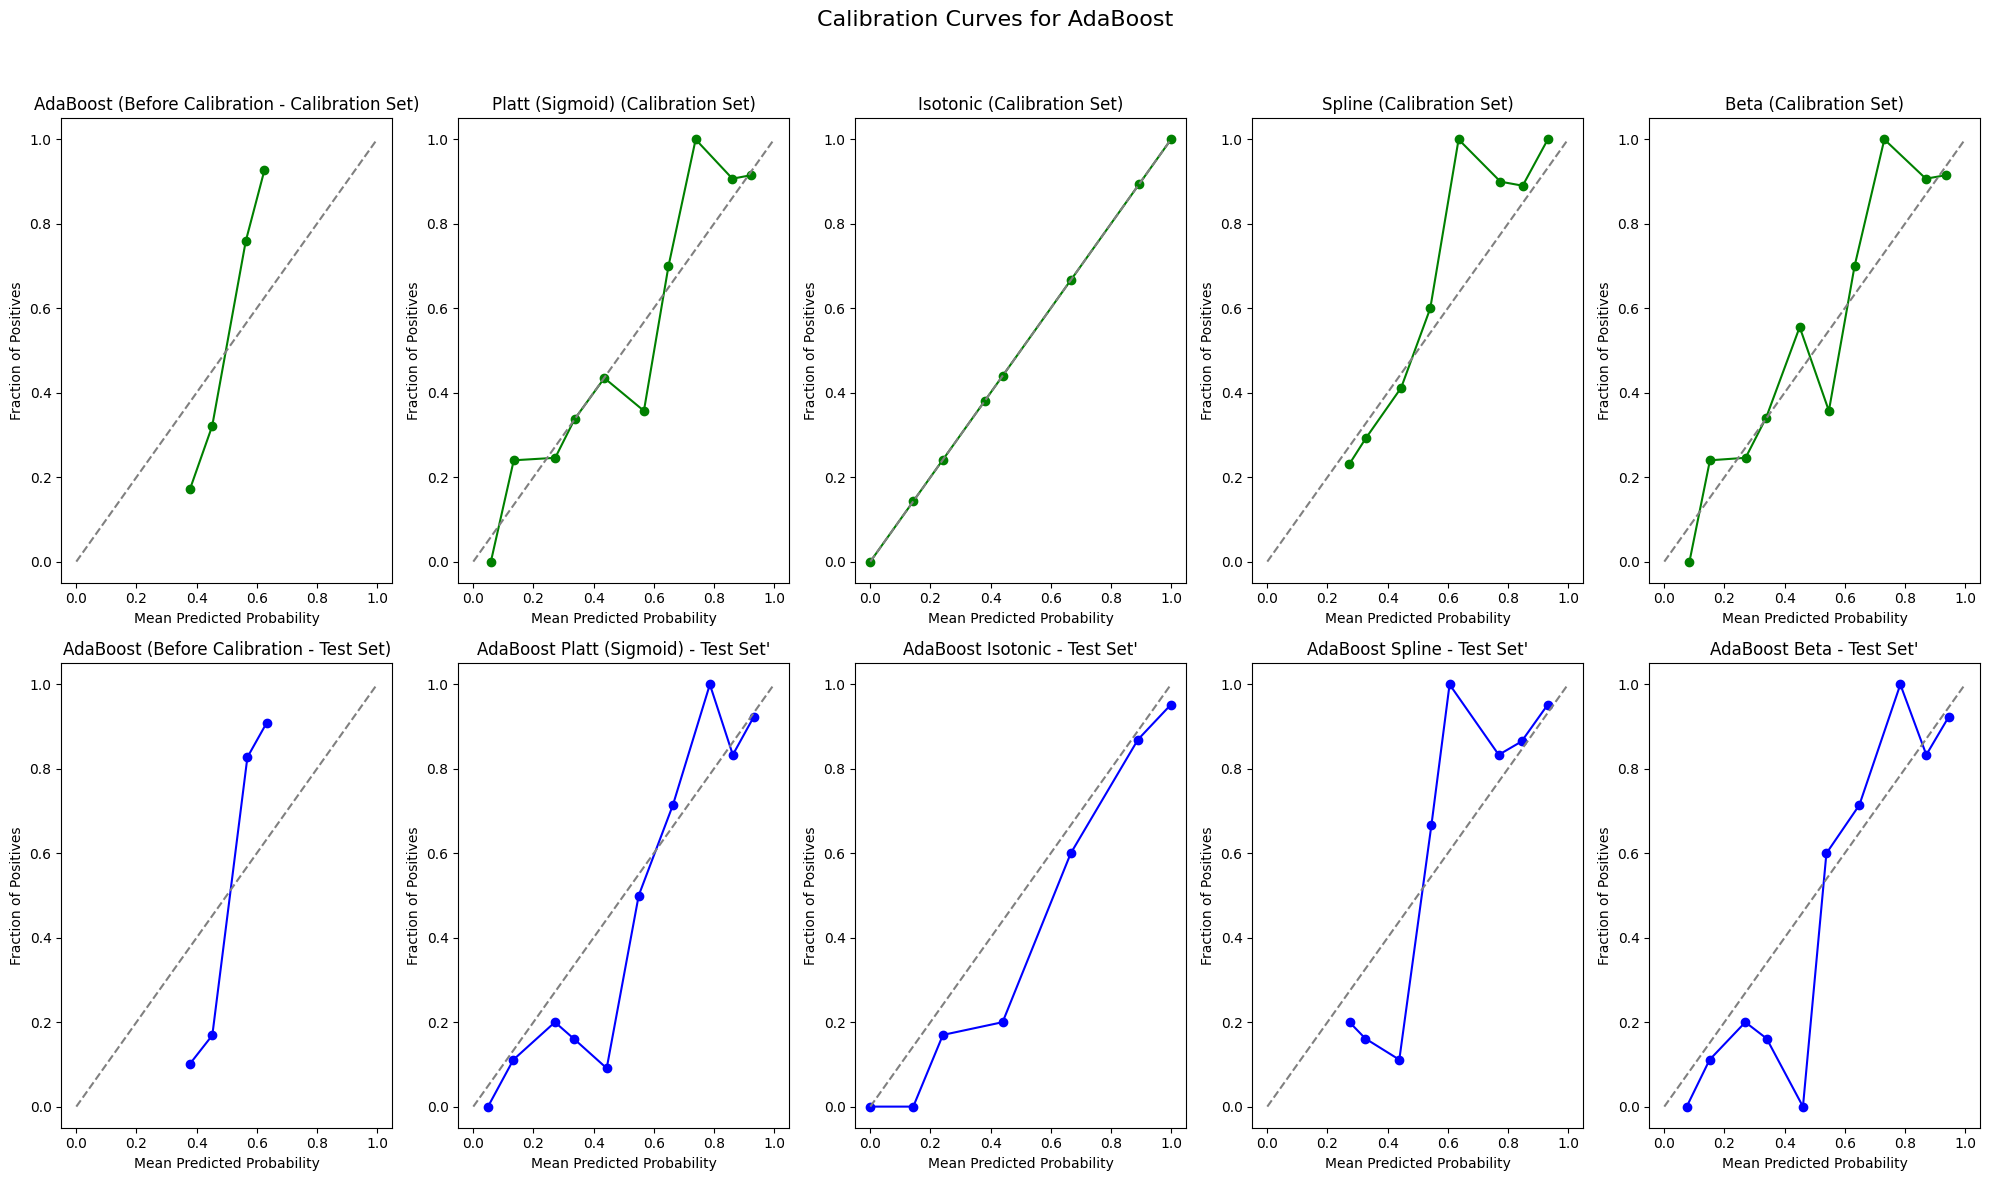

   Accuracy  Precision    Recall  F1 Score       MCC  Brier Score   AUC-ROC  \
0  0.857143   0.876712  0.831169  0.853333  0.715251     0.197258  0.868865   
1  0.844156   0.844156  0.844156  0.844156  0.688312     0.138065  0.868865   
2  0.850649   0.875000  0.818182  0.845638  0.702782     0.134554  0.874178   
3  0.857143   0.876712  0.831169  0.853333  0.715251     0.140868  0.865154   
4  0.850649   0.855263  0.844156  0.849673  0.701358     0.136799  0.868865   

                          Model  
0                     Raw Model  
1  Calibrated (Platt (Sigmoid))  
2         Calibrated (Isotonic)  
3           Calibrated (Spline)  
4             Calibrated (Beta)  


In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, brier_score_loss, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from betacal import BetaCalibration
from patsy import dmatrix
from sklearn.linear_model import LogisticRegression
import warnings

# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score',
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()

# Step 4: Split the training data for calibration
X_train_final, X_calib, y_train_final, y_calib = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Step 5: Define AdaBoost pipeline with scaling and DecisionTreeClassifier as the base learner
pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostClassifier(DecisionTreeClassifier(), random_state=42))
])

# Step 6: Define hyperparameter grid for GridSearchCV
param_grid_ada = {
    'model__n_estimators': [10, 100, 200],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'model__estimator__max_depth': [1, 3, 5],
}

# Step 7: Perform GridSearchCV
search_ada = GridSearchCV(pipeline_ada, param_grid_ada, scoring='accuracy', cv=5, refit=True)
search_ada.fit(X_train_final, y_train_final)
best_model_ada = search_ada.best_estimator_

# Step 8: Define the calibration methods
class SplineCalibratedModel:
    def __init__(self, base_model):
        self.base_model = base_model
        self.spline_model = LogisticRegression()

    def fit(self, X, y):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        self.spline_model.fit(X_spline, y)

    def predict_proba(self, X):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        calibrated_proba = self.spline_model.predict_proba(X_spline)[:, 1]
        return np.column_stack([1 - calibrated_proba, calibrated_proba])

    def predict(self, X):
        # Predict using the calibrated probabilities
        y_pred_proba = self.predict_proba(X)[:, 1]
        return (y_pred_proba >= 0.5).astype(int)

calibration_methods = {
    "Platt (Sigmoid)": CalibratedClassifierCV(best_model_ada, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(best_model_ada, method='isotonic', cv='prefit'),
    "Spline": SplineCalibratedModel(best_model_ada),
    "Beta": BetaCalibration()
}

# Step 9: Fit calibration models
for name, model in calibration_methods.items():
    if isinstance(model, BetaCalibration):
        model.fit(best_model_ada.predict_proba(X_calib)[:, 1], y_calib)
    else:
        model.fit(X_calib, y_calib)

# Step 10: Plot calibration curves
def plot_calibration_curves(models_dict, X_calib, y_calib, X_test, y_test):
    fig, ax = plt.subplots(2, len(models_dict) + 1, figsize=(20, 12))
    fig.suptitle("Calibration Curves for AdaBoost", fontsize=16)

    # Row 1: Calibration Set
    prob_true_raw_calib, prob_pred_raw_calib = calibration_curve(y_calib, best_model_ada.predict_proba(X_calib)[:, 1], n_bins=10)
    ax[0, 0].plot(prob_pred_raw_calib, prob_true_raw_calib, marker='o', color='green')
    ax[0, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[0, 0].set_title("AdaBoost (Before Calibration - Calibration Set)")
    ax[0, 0].set_xlabel("Mean Predicted Probability")
    ax[0, 0].set_ylabel("Fraction of Positives")

    # Row 2: Test Set
    prob_true_raw_test, prob_pred_raw_test = calibration_curve(y_test, best_model_ada.predict_proba(X_test)[:, 1], n_bins=10)
    ax[1, 0].plot(prob_pred_raw_test, prob_true_raw_test, marker='o', color='blue')
    ax[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[1, 0].set_title("AdaBoost (Before Calibration - Test Set)")
    ax[1, 0].set_xlabel("Mean Predicted Probability")
    ax[1, 0].set_ylabel("Fraction of Positives")

    for i, (name, model) in enumerate(models_dict.items()):
        # Calibration Set
        if isinstance(model, BetaCalibration):
            prob_pred_calib = model.predict(best_model_ada.predict_proba(X_calib)[:, 1])
        else:
            prob_pred_calib = model.predict_proba(X_calib)[:, 1]
        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        ax[0, i + 1].plot(prob_pred_calib, prob_true_calib, marker='o', color='green')
        ax[0, i + 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[0, i + 1].set_title(f"{name} (Calibration Set)")
        ax[0, i + 1].set_xlabel("Mean Predicted Probability")
        ax[0, i + 1].set_ylabel("Fraction of Positives")

        # Test Set
        if isinstance(model, BetaCalibration):
            prob_pred_test = model.predict(best_model_ada.predict_proba(X_test)[:, 1])
        else:
            prob_pred_test = model.predict_proba(X_test)[:, 1]
        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)
        ax[1, i + 1].plot(prob_pred_test, prob_true_test, marker='o', color='blue')
        ax[1, i + 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[1, i + 1].set_title(f"AdaBoost {name} - Test Set'")
        ax[1, i + 1].set_xlabel("Mean Predicted Probability")
        ax[1, i + 1].set_ylabel("Fraction of Positives")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("calibration_curves_adaboost.png", dpi=300)
    plt.show()

plot_calibration_curves(calibration_methods, X_calib, y_calib, X_test, y_test)

# Step 11: Save metrics
def get_metrics(y_true, y_pred, y_pred_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Brier Score': brier_score_loss(y_true, y_pred_proba),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)
    }

calibration_results = []

# Raw model metrics
y_pred_raw_test = best_model_ada.predict(X_test)
y_pred_raw_proba_test = best_model_ada.predict_proba(X_test)[:, 1]
metrics_raw = get_metrics(y_test, y_pred_raw_test, y_pred_raw_proba_test)
metrics_raw['Model'] = 'Raw Model'
calibration_results.append(metrics_raw)

# Calibrated models metrics
for name, model in calibration_methods.items():
    if isinstance(model, BetaCalibration):
        y_pred_proba_calib = model.predict(best_model_ada.predict_proba(X_test)[:, 1])
        y_pred_calib = (y_pred_proba_calib >= 0.5).astype(int)
    else:
        y_pred_proba_calib = model.predict_proba(X_test)[:, 1]
        y_pred_calib = model.predict(X_test)
    metrics_calib = get_metrics(y_test, y_pred_calib, y_pred_proba_calib)
    metrics_calib['Model'] = f"Calibrated ({name})"
    calibration_results.append(metrics_calib)

df_calibration_results = pd.DataFrame(calibration_results)
print(df_calibration_results)


Low Risk: 72 patients
Medium Risk: 25 patients
High Risk: 57 patients
Percentage of Positive Outcomes in Each Risk Stratum:
Risk Stratum
High      15.789474
Low       87.500000
Medium    20.000000
Name: Actual Outcome, dtype: float64


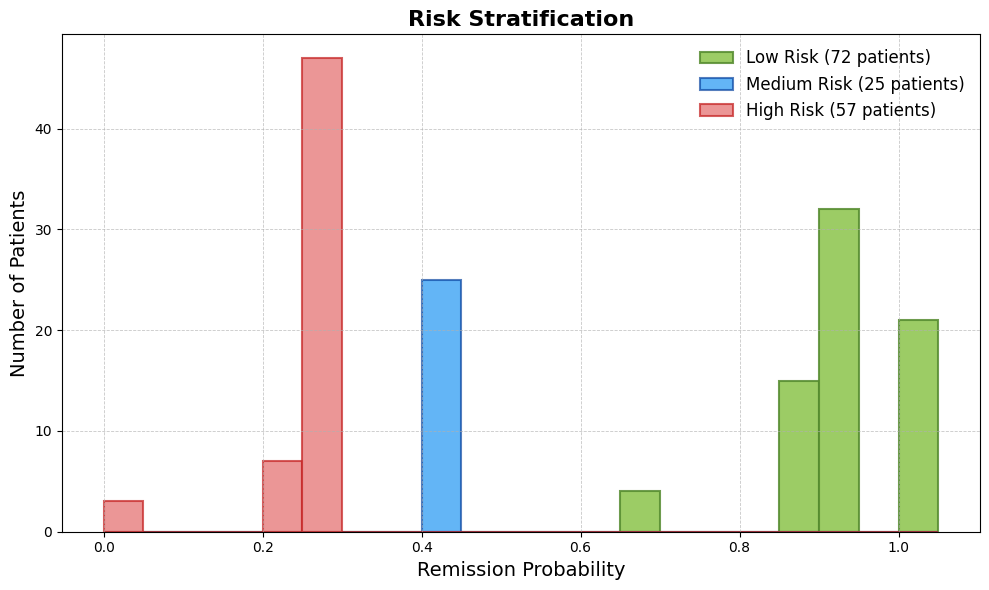

In [31]:
# Predict probabilities using the Isotonic-calibrated AdaBoost model
# Adding Risk Stratification

#Define risk stratification thresholds
low_risk_threshold = 0.66
high_risk_threshold = 0.33

# Predict probabilities using the Isotonic model
y_pred_proba = calibration_methods["Isotonic"].predict_proba(X_test)[:, 1]

# Define risk stratification groups
low_risk = y_pred_proba > low_risk_threshold
medium_risk = (y_pred_proba <= low_risk_threshold) & (y_pred_proba >= high_risk_threshold)
high_risk = y_pred_proba < high_risk_threshold

# Count the number of patients in each risk group
low_risk_count = low_risk.sum()
medium_risk_count = medium_risk.sum()
high_risk_count = high_risk.sum()

print(f'Low Risk: {low_risk_count} patients')
print(f'Medium Risk: {medium_risk_count} patients')
print(f'High Risk: {high_risk_count} patients')

# Analyze the proportion of actual outcomes in each risk group
results_df = pd.DataFrame({
    'Predicted Probability': y_pred_proba,
    'Risk Stratum': np.select([low_risk, medium_risk, high_risk], ['Low', 'Medium', 'High']),
    'Actual Outcome': y_test
})

# Calculate percentage of positive outcomes in each stratum
strata_analysis = results_df.groupby('Risk Stratum')['Actual Outcome'].mean() * 100
print(f'Percentage of Positive Outcomes in Each Risk Stratum:\n{strata_analysis}')
# Visualize the distribution of predicted probabilities for each risk stratum
plt.figure(figsize=(10, 6))

bins = np.arange(0, 1.1, 0.05)

# Low Risk: Soft green
plt.hist(y_pred_proba[low_risk], bins=bins, color='#8BC34A', alpha=0.85, 
         label=f'Low Risk ({low_risk_count} patients)', edgecolor='#558B2F', linewidth=1.5)

# Medium Risk: Soft blue
plt.hist(y_pred_proba[medium_risk], bins=bins, color='#2196F3', alpha=0.7, 
         label=f'Medium Risk ({medium_risk_count} patients)', edgecolor='#0D47A1', linewidth=1.5)

# High Risk: Soft red
plt.hist(y_pred_proba[high_risk], bins=bins, color='#E57373', alpha=0.75, 
         label=f'High Risk ({high_risk_count} patients)', edgecolor='#C62828', linewidth=1.5)

# Add labels and title in IEEE style
plt.xlabel('Remission Probability', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.title('Risk Stratification', fontsize=16, fontweight='bold')

# Customize the legend
plt.legend(fontsize=12, frameon=False)

# Subtle grid for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Improve layout and save the plot
plt.tight_layout()
plt.savefig('remission_risk_stratification_adaboost.png', dpi=300)
plt.show()


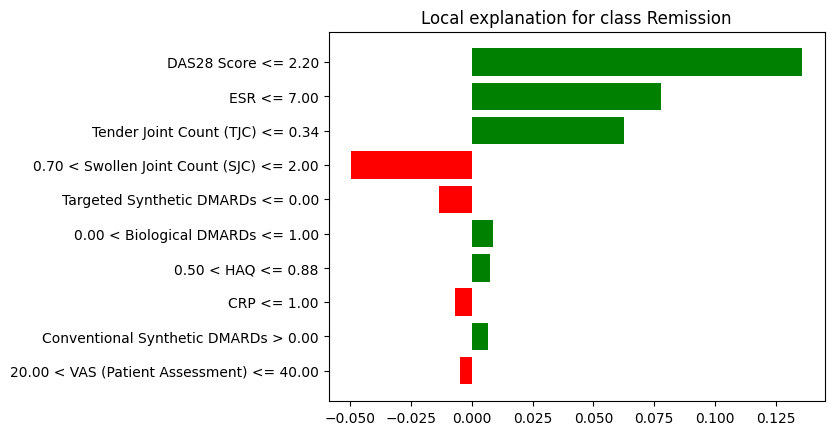

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lime import lime_tabular

# Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()

# Train an AdaBoost model with DecisionTree as the base learner
base_estimator = DecisionTreeClassifier(max_depth=3)  # Weak learners
model = AdaBoostClassifier(base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Initialize LIME explainer for tabular data
explainer = lime_tabular.LimeTabularExplainer(X_train, 
                                              feature_names=dataset.drop(['remission'], axis=1).columns,
                                              class_names=['No Remission', 'Remission'], 
                                              discretize_continuous=True)

# Pick a sample index to explain
sample_index = 0
sample = X_test[sample_index]

# Explain the prediction for the chosen sample
exp = explainer.explain_instance(sample, model.predict_proba, num_features=10)

# Visualize the explanation as a table
exp.show_in_notebook(show_table=True, show_all=False)

# Alternatively, save the explanation as an HTML file
exp.save_to_file('lime_explanation.html')

# Optional: Visualize the LIME explanation as a bar plot
exp.as_pyplot_figure()
plt.show()


# SVM

In [36]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, brier_score_loss, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
from betacal import BetaCalibration
import warnings
from scipy.stats import uniform  # Importing uniform from scipy.stats

# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score', 
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()

# Step 1: Split the training data for calibration
X_train_final, X_calib, y_train_final, y_calib = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Define SVM pipeline with scaling and SVM classifier
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', SVC(probability=True, class_weight='balanced', random_state=42))  # SVM with probability estimation
])

# Step 3: Define a reduced random search space for RandomizedSearchCV
param_dist_svm = {
    'model__kernel': ['linear', 'rbf'],  # Reduced kernels to only 'linear' and 'rbf'
    'model__C': (0.01,0,1,1,5, 10),  # Uniform distribution for 'C' parameter
    'model__gamma': ['scale', 'auto']  # 'scale' and 'auto' to speed up search
}



# Step 4: Hyperparameter tuning with expanded GridSearchCV
search_svm = GridSearchCV(pipeline_svm, param_dist_svm, scoring='accuracy', cv=5, refit=True)
search_svm.fit(X_train_final, y_train_final)

# Get the best model and best hyperparameters from the grid search
best_model_svm = search_svm.best_estimator_

# Helper function to ensure correct format for class 1 probabilities
def get_class_1_probs(model, X):
    probs = model.predict_proba(X)
    return probs[:, 1] if probs.ndim == 2 else probs

# Step 5: Plot Confusion Matrix Helper Function
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(title, fontsize=16)
    plt.savefig(filename, dpi=300)
    plt.show()

# Step 6: Get confusion matrix for the raw SVM model (before calibration)
y_pred_raw_test = best_model_svm.predict(X_test)
cm_raw = confusion_matrix(y_test, y_pred_raw_test)
plot_confusion_matrix(cm_raw, "Confusion Matrix (Before Calibration - SVM)", "conf_matrix_before_calibration_svm.png")

# Step 7: Define the SplineCalibratedModel and BetaCalibratedModel classes
class SplineCalibratedModel:
    def __init__(self, base_model):
        self.base_model = base_model
        self.spline_model = LogisticRegression()

    def fit(self, X, y):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        self.spline_model.fit(X_spline, y)

    def predict_proba(self, X):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        calibrated_proba = self.spline_model.predict_proba(X_spline)[:, 1]
        return calibrated_proba

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

class BetaCalibratedModel:
    def __init__(self, model):
        self.model = model
        self.calibrator = None

    def fit(self, X, y):
        self.model.fit(X, y)
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        self.calibrator = BetaCalibration()
        self.calibrator.fit(y_pred_proba, y)

    def predict_proba(self, X):
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        return self.calibrator.predict(y_pred_proba)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

# Step 8: Define all four calibration methods (Platt, Isotonic, Spline, Beta)
calibration_methods = {
    "Platt (Sigmoid)": CalibratedClassifierCV(best_model_svm, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(best_model_svm, method='isotonic', cv='prefit'),
    "Spline": SplineCalibratedModel(best_model_svm),
    "Beta": BetaCalibratedModel(best_model_svm)
}

# Step 9: Fit calibration models
for name, model in calibration_methods.items():
    model.fit(X_calib, y_calib)

# Step 10: Plot calibration curves for calibration and test sets
def plot_calibration_curves_with_metrics(models_dict, X_calib, y_calib, X_test, y_test):
    fig, ax = plt.subplots(2, len(models_dict) + 1, figsize=(26, 12))
    
    # Plot for raw SVM model (before calibration)
    prob_pred_raw_calib = get_class_1_probs(best_model_svm, X_calib)
    prob_pred_raw_test = get_class_1_probs(best_model_svm, X_test)

    prob_true_raw_calib, prob_pred_raw_calib = calibration_curve(y_calib, prob_pred_raw_calib, n_bins=10)
    prob_true_raw_test, prob_pred_raw_test = calibration_curve(y_test, prob_pred_raw_test, n_bins=10)

    ax[0, 0].plot(prob_pred_raw_calib, prob_true_raw_calib, marker='o', color='green')
    ax[0, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[0, 0].set_title(f'SVM (Before Calibration) - Calibration Set', fontsize=14)
    ax[0, 0].set_xlabel('Mean Predicted Probability', fontsize=12)
    ax[0, 0].set_ylabel('Fraction of Positives', fontsize=12)

    ax[1, 0].plot(prob_pred_raw_test, prob_true_raw_test, marker='o', color='blue')
    ax[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[1, 0].set_title(f'SVM (Before Calibration) - Test Set', fontsize=14)
    ax[1, 0].set_xlabel('Mean Predicted Probability', fontsize=12)
    ax[1, 0].set_ylabel('Fraction of Positives', fontsize=12)

    # Plot for each calibrated model
    for i, (name, model) in enumerate(models_dict.items()):
        prob_pred_calib = get_class_1_probs(model, X_calib)
        prob_pred_test = get_class_1_probs(model, X_test)

        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)

        ax[0, i+1].plot(prob_pred_calib, prob_true_calib, marker='o', color='green')
        ax[0, i+1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[0, i+1].set_title(f'SVM {name} - Calibration Set', fontsize=14)
        ax[0, i+1].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[0, i+1].set_ylabel('Fraction of Positives', fontsize=12)

        ax[1, i+1].plot(prob_pred_test, prob_true_test, marker='o', color='blue')
        ax[1, i+1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[1, i+1].set_title(f'SVM {name} - Test Set', fontsize=14)
        ax[1, i+1].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[1, i+1].set_ylabel('Fraction of Positives', fontsize=12)

    plt.tight_layout()
    plt.savefig('calibration_curves_svm.png', dpi=300)  # Save all calibration curves as one image
    plt.show()

# Step 11: Call the function to plot and save calibration curves
plot_calibration_curves_with_metrics(calibration_methods, X_calib, y_calib, X_test, y_test)

# Step 12: Save the metrics for each model to a DataFrame
calibration_results = []

# Metrics function
def get_metrics(y_true, y_pred, y_pred_proba):
    return {
        'Brier Score': brier_score_loss(y_true, y_pred_proba),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)  # AUC-ROC added here
    }

# Metrics for the raw SVM model (before calibration)
metrics_raw = get_metrics(y_test, y_pred_raw_test, best_model_svm.predict_proba(X_test)[:, 1])
metrics_raw['Model'] = 'SVM (Before Calibration)'
calibration_results.append(metrics_raw)

# Metrics for each calibration method
for name, model in calibration_methods.items():
    y_pred_calibrated_test = model.predict(X_test)
    y_pred_proba_calibrated_test = get_class_1_probs(model, X_test)
    metrics_calibrated = get_metrics(y_test, y_pred_calibrated_test, y_pred_proba_calibrated_test)
    metrics_calibrated['Model'] = f'SVM (After Calibration - {name})'
    calibration_results.append(metrics_calibrated)

# Convert to DataFrame
df_calibration_results = pd.DataFrame(calibration_results)

# Save the DataFrame to a CSV file
df_calibration_results.to_csv('calibration_results_svm.csv', index=False)

# Display the DataFrame
print(df_calibration_results)


   Brier Score  Accuracy  Precision    Recall  F1 Score       MCC   AUC-ROC  \
0     0.182479  0.740260   0.740260  0.740260  0.740260  0.480519  0.876033   
1     0.184079  0.779221   0.726316  0.896104  0.802326  0.574355  0.876033   
2     0.197407  0.740260   0.679612  0.909091  0.777778  0.510503  0.834373   
3     0.161169  0.798701   0.761364  0.870130  0.812121  0.603593  0.881430   
4     0.178182  0.720779   0.657407  0.922078  0.767568  0.482379  0.876033   

                                       Model  
0                   SVM (Before Calibration)  
1  SVM (After Calibration - Platt (Sigmoid))  
2         SVM (After Calibration - Isotonic)  
3           SVM (After Calibration - Spline)  
4             SVM (After Calibration - Beta)  


In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, brier_score_loss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
from betacal import BetaCalibration
# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score', 
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()

# Step 1: Split the training data for calibration
X_train_final, X_calib, y_train_final, y_calib = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Define a pipeline with scaling and SVM classifier
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', SVC(probability=True, class_weight='balanced'))  # SVM with probability estimation
])

# Step 3: Define a reduced random search space for RandomizedSearchCV
param_dist_svm = {
    'model__kernel': ['linear', 'rbf'],  # Reduced kernels to only 'linear' and 'rbf'
    'model__C': (0.01,0,1,1,5,10),  # Uniform distribution for 'C' parameter
    'model__gamma': ['scale', 'auto']  # 'scale' and 'auto' to speed up search
}


# Step 4: Hyperparameter tuning with expanded GridSearchCV
search_svm = GridSearchCV(pipeline_svm, param_dist_svm, scoring='accuracy', cv=5, refit=True)
search_svm.fit(X_train_final, y_train_final)

# Get the best model and best hyperparameters from the grid search
best_model_svm = search_svm.best_estimator_



# Helper function to ensure correct format for class 1 probabilities
def get_class_1_probs(model, X):
    probs = model.predict_proba(X)
    return probs[:, 1] if probs.ndim == 2 else probs

# Step 5: Plot Confusion Matrix Helper Function
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(title, fontsize=16)
    plt.savefig(filename, dpi=300)
    plt.show()

# Step 6: Get confusion matrix for the raw SVM model (before calibration)
y_pred_raw_test = best_model_svm.predict(X_test)
cm_raw = confusion_matrix(y_test, y_pred_raw_test)
plot_confusion_matrix(cm_raw, "Confusion Matrix (Before Calibration - SVM)", "conf_matrix_before_calibration_svm.png")

# Step 7: Define the SplineCalibratedModel and BetaCalibratedModel classes
class SplineCalibratedModel:
    def __init__(self, base_model):
        self.base_model = base_model
        self.spline_model = LogisticRegression()

    def fit(self, X, y):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        self.spline_model.fit(X_spline, y)

    def predict_proba(self, X):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        calibrated_proba = self.spline_model.predict_proba(X_spline)[:, 1]
        return calibrated_proba

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

class BetaCalibratedModel:
    def __init__(self, model):
        self.model = model
        self.calibrator = None

    def fit(self, X, y):
        self.model.fit(X, y)
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        self.calibrator = BetaCalibration()
        self.calibrator.fit(y_pred_proba, y)

    def predict_proba(self, X):
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        return self.calibrator.predict(y_pred_proba)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

# Step 8: Define all four calibration methods (Platt, Isotonic, Spline, Beta)
calibration_methods = {
    "Platt (Sigmoid)": CalibratedClassifierCV(best_model_svm, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(best_model_svm, method='isotonic', cv='prefit'),
    "Spline": SplineCalibratedModel(best_model_svm),
    "Beta": BetaCalibratedModel(best_model_svm)
}

# Step 9: Fit calibration models
for name, model in calibration_methods.items():
    model.fit(X_calib, y_calib)

# Step 10: Plot calibration curves for calibration and test sets
def plot_calibration_curves_with_metrics(models_dict, X_calib, y_calib, X_test, y_test):
    fig, ax = plt.subplots(2, len(models_dict) + 1, figsize=(20, 12))
    
    # Plot for raw SVM model (before calibration)
    prob_pred_raw_calib = get_class_1_probs(best_model_svm, X_calib)
    prob_pred_raw_test = get_class_1_probs(best_model_svm, X_test)

    prob_true_raw_calib, prob_pred_raw_calib = calibration_curve(y_calib, prob_pred_raw_calib, n_bins=10)
    prob_true_raw_test, prob_pred_raw_test = calibration_curve(y_test, prob_pred_raw_test, n_bins=10)

    ax[0, 0].plot(prob_pred_raw_calib, prob_true_raw_calib, marker='o', color='green')
    ax[0, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[0, 0].set_title(f'SVM (Before Calibration) - Calibration Set', fontsize=14)
    ax[0, 0].set_xlabel('Mean Predicted Probability', fontsize=12)
    ax[0, 0].set_ylabel('Fraction of Positives', fontsize=12)

    ax[1, 0].plot(prob_pred_raw_test, prob_true_raw_test, marker='o', color='blue')
    ax[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[1, 0].set_title(f'SVM (Before Calibration) - Test Set', fontsize=14)
    ax[1, 0].set_xlabel('Mean Predicted Probability', fontsize=12)
    ax[1, 0].set_ylabel('Fraction of Positives', fontsize=12)

    # Plot for each calibrated model
    for i, (name, model) in enumerate(models_dict.items()):
        prob_pred_calib = get_class_1_probs(model, X_calib)
        prob_pred_test = get_class_1_probs(model, X_test)

        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)

        ax[0, i+1].plot(prob_pred_calib, prob_true_calib, marker='o', color='green')
        ax[0, i+1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[0, i+1].set_title(f'SVM {name} - Calibration Set', fontsize=14)
        ax[0, i+1].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[0, i+1].set_ylabel('Fraction of Positives', fontsize=12)

        ax[1, i+1].plot(prob_pred_test, prob_true_test, marker='o', color='blue')
        ax[1, i+1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[1, i+1].set_title(f'SVM {name} - Test Set', fontsize=14)
        ax[1, i+1].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[1, i+1].set_ylabel('Fraction of Positives', fontsize=12)

    plt.tight_layout()
    plt.savefig('calibration_curves_svm.png', dpi=300)  # Save all calibration curves as one image
    plt.show()

# Step 11: Call the function to plot and save calibration curves
plot_calibration_curves_with_metrics(calibration_methods, X_calib, y_calib, X_test, y_test)

# Step 12: Save the metrics for each model to a DataFrame
calibration_results = []

# Metrics function
def get_metrics(y_true, y_pred, y_pred_proba):
    return {
        'Brier Score': brier_score_loss(y_true, y_pred_proba),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred)
    }

# Metrics for the raw SVM model (before calibration)
metrics_raw = get_metrics(y_test, y_pred_raw_test, best_model_svm.predict_proba(X_test)[:, 1])
metrics_raw['Model'] = 'SVM (Before Calibration)'
calibration_results.append(metrics_raw)

# Metrics for each calibration method
for name, model in calibration_methods.items():
    y_pred_calibrated_test = model.predict(X_test)
    y_pred_proba_calibrated_test = get_class_1_probs(model, X_test)
    metrics_calibrated = get_metrics(y_test, y_pred_calibrated_test, y_pred_proba_calibrated_test)
    metrics_calibrated['Model'] = f'SVM (After Calibration - {name})'
    calibration_results.append(metrics_calibrated)

# Convert to DataFrame
df_calibration_results = pd.DataFrame(calibration_results)

# Save the DataFrame to a CSV file
df_calibration_results.to_csv('calibration_results_svm.csv', index=False)

# Display the DataFrame
print(df_calibration_results)

   Brier Score  Accuracy  Precision    Recall  F1 Score       MCC  \
0     0.179418  0.740260   0.740260  0.740260  0.740260  0.480519   
1     0.184079  0.779221   0.726316  0.896104  0.802326  0.574355   
2     0.197407  0.740260   0.679612  0.909091  0.777778  0.510503   
3     0.160902  0.792208   0.758621  0.857143  0.804878  0.589407   
4     0.178087  0.720779   0.657407  0.922078  0.767568  0.482379   

                                       Model  
0                   SVM (Before Calibration)  
1  SVM (After Calibration - Platt (Sigmoid))  
2         SVM (After Calibration - Isotonic)  
3           SVM (After Calibration - Spline)  
4             SVM (After Calibration - Beta)  


# Random Forest

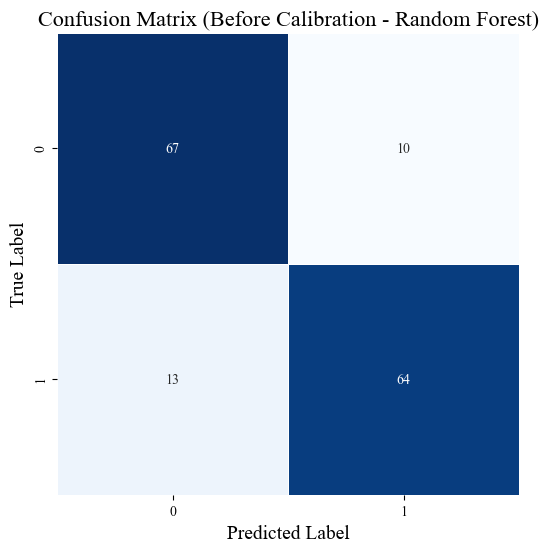

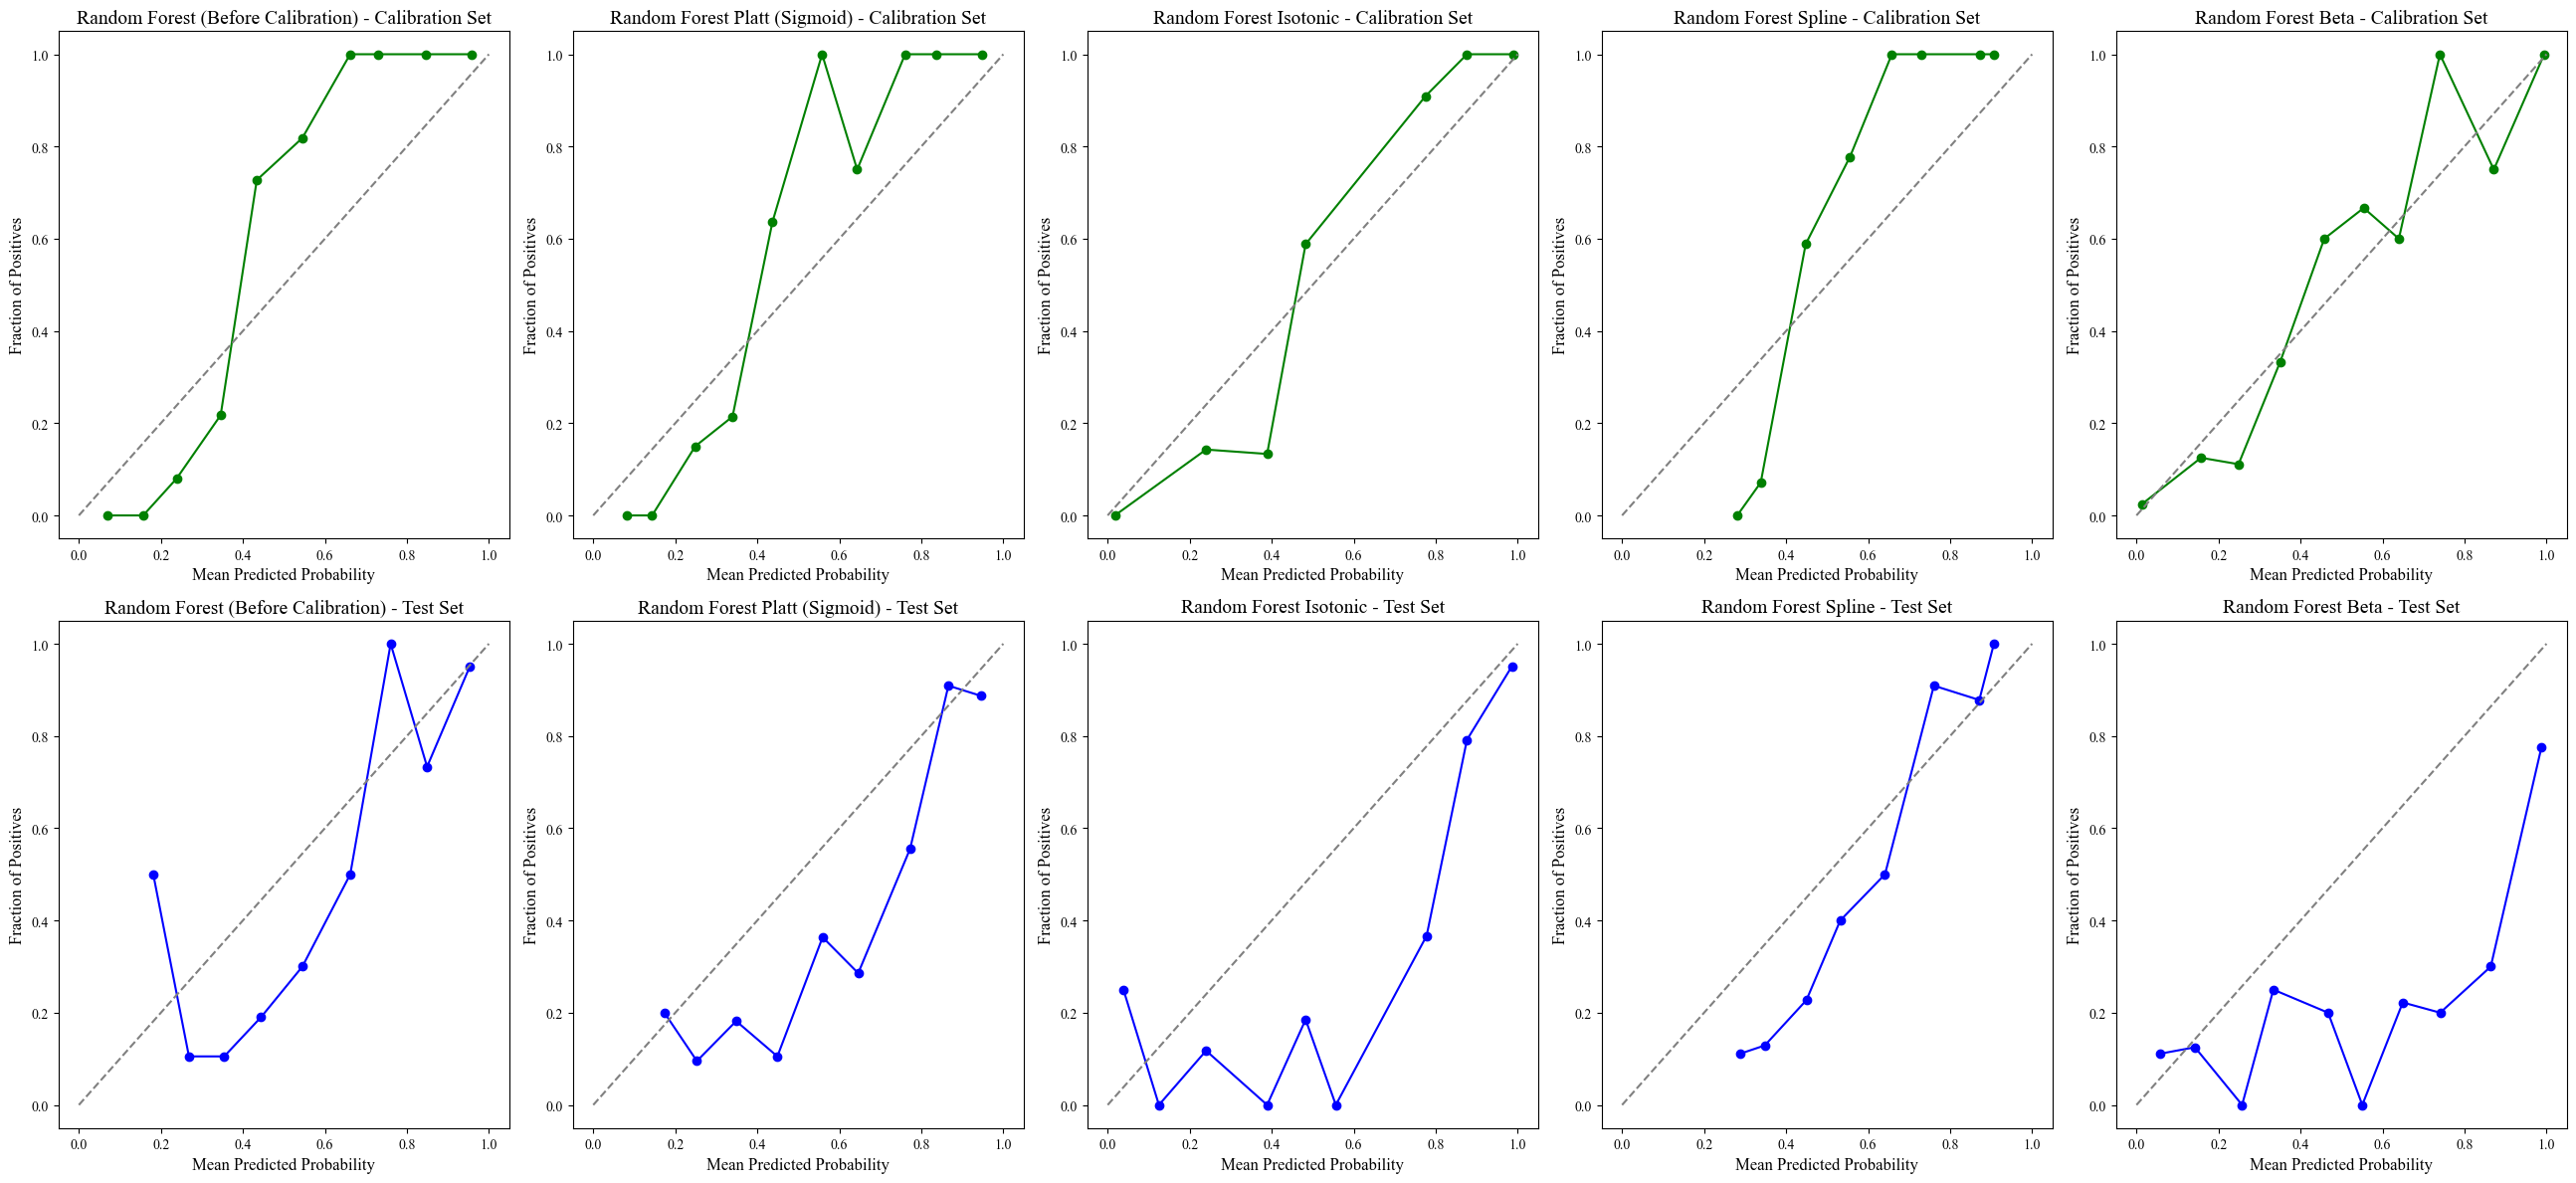

   Brier Score  Accuracy  Precision    Recall  F1 Score       MCC   AUC-ROC  \
0     0.155336  0.850649   0.864865  0.831169  0.847682  0.701832  0.885141   
1     0.164515  0.772727   0.714286  0.909091  0.800000  0.566947  0.885141   
2     0.190754  0.772727   0.718750  0.896104  0.797688  0.562859  0.876370   
3     0.150840  0.818182   0.795181  0.857143  0.825000  0.638304  0.885141   
4     0.228902  0.694805   0.631579  0.935065  0.753927  0.444262  0.885141   

                                               Model  
0                 Random Forest (Before Calibration)  
1  Random Forest (After Calibration - Platt (Sigm...  
2       Random Forest (After Calibration - Isotonic)  
3         Random Forest (After Calibration - Spline)  
4           Random Forest (After Calibration - Beta)  


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, brier_score_loss, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
from betacal import BetaCalibration
import warnings

# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score', 
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()

# Step 1: Split the training data for calibration
X_train_final, X_calib, y_train_final, y_calib = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Define Random Forest pipeline with scaling
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Random Forest
])

# Step 5: Define the expanded grid of hyperparameters to search
param_grid_rf = {
    'model__n_estimators': [50, 100],  # Lower number of trees
    'model__max_depth': [5, 10],       # Control tree depth to prevent overfitting
    'model__max_features': ['sqrt', 'log2'],
    'model__criterion': ['gini', 'entropy']
}

# Step 6: Hyperparameter tuning with GridSearchCV
search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='accuracy', cv=5, refit=True)
search_rf.fit(X_train_final, y_train_final)

# Get the best model and best hyperparameters from the grid search
best_model_rf = search_rf.best_estimator_

# Helper function to ensure correct format for class 1 probabilities
def get_class_1_probs(model, X):
    probs = model.predict_proba(X)
    return probs[:, 1] if probs.ndim == 2 else probs

# Step 7: Plot Confusion Matrix Helper Function
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(title, fontsize=16)
    plt.savefig(filename, dpi=300)
    plt.show()

# Step 8: Get confusion matrix for the raw Random Forest model (before calibration)
y_pred_raw_test = best_model_rf.predict(X_test)
cm_raw = confusion_matrix(y_test, y_pred_raw_test)
plot_confusion_matrix(cm_raw, "Confusion Matrix (Before Calibration - Random Forest)", "conf_matrix_before_calibration_rf.png")

# Step 9: Define the SplineCalibratedModel and BetaCalibratedModel classes
class SplineCalibratedModel:
    def __init__(self, base_model):
        self.base_model = base_model
        self.spline_model = LogisticRegression()

    def fit(self, X, y):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        self.spline_model.fit(X_spline, y)

    def predict_proba(self, X):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        calibrated_proba = self.spline_model.predict_proba(X_spline)[:, 1]
        return calibrated_proba

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

class BetaCalibratedModel:
    def __init__(self, model):
        self.model = model
        self.calibrator = None

    def fit(self, X, y):
        self.model.fit(X, y)
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        self.calibrator = BetaCalibration()
        self.calibrator.fit(y_pred_proba, y)

    def predict_proba(self, X):
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        return self.calibrator.predict(y_pred_proba)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

# Step 10: Define all four calibration methods (Platt, Isotonic, Spline, Beta)
calibration_methods = {
    "Platt (Sigmoid)": CalibratedClassifierCV(best_model_rf, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(best_model_rf, method='isotonic', cv='prefit'),
    "Spline": SplineCalibratedModel(best_model_rf),
    "Beta": BetaCalibratedModel(best_model_rf)
}

# Step 11: Fit calibration models
for name, model in calibration_methods.items():
    model.fit(X_calib, y_calib)

# Step 12: Plot calibration curves for calibration and test sets
def plot_calibration_curves_with_metrics(models_dict, X_calib, y_calib, X_test, y_test):
    fig, ax = plt.subplots(2, len(models_dict) + 1, figsize=(26, 12))
    
    # Plot for raw Random Forest model (before calibration)
    prob_pred_raw_calib = get_class_1_probs(best_model_rf, X_calib)
    prob_pred_raw_test = get_class_1_probs(best_model_rf, X_test)

    prob_true_raw_calib, prob_pred_raw_calib = calibration_curve(y_calib, prob_pred_raw_calib, n_bins=10)
    prob_true_raw_test, prob_pred_raw_test = calibration_curve(y_test, prob_pred_raw_test, n_bins=10)

    ax[0, 0].plot(prob_pred_raw_calib, prob_true_raw_calib, marker='o', color='green')
    ax[0, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[0, 0].set_title(f'Random Forest (Before Calibration) - Calibration Set', fontsize=14)
    ax[0, 0].set_xlabel('Mean Predicted Probability', fontsize=12)
    ax[0, 0].set_ylabel('Fraction of Positives', fontsize=12)

    ax[1, 0].plot(prob_pred_raw_test, prob_true_raw_test, marker='o', color='blue')
    ax[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[1, 0].set_title(f'Random Forest (Before Calibration) - Test Set', fontsize=14)
    ax[1, 0].set_xlabel('Mean Predicted Probability', fontsize=12)
    ax[1, 0].set_ylabel('Fraction of Positives', fontsize=12)

    # Plot for each calibrated model
    for i, (name, model) in enumerate(models_dict.items()):
        prob_pred_calib = get_class_1_probs(model, X_calib)
        prob_pred_test = get_class_1_probs(model, X_test)

        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)

        ax[0, i+1].plot(prob_pred_calib, prob_true_calib, marker='o', color='green')
        ax[0, i+1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[0, i+1].set_title(f'Random Forest {name} - Calibration Set', fontsize=14)
        ax[0, i+1].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[0, i+1].set_ylabel('Fraction of Positives', fontsize=12)

        ax[1, i+1].plot(prob_pred_test, prob_true_test, marker='o', color='blue')
        ax[1, i+1].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[1, i+1].set_title(f'Random Forest {name} - Test Set', fontsize=14)
        ax[1, i+1].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[1, i+1].set_ylabel('Fraction of Positives', fontsize=12)

    plt.tight_layout()
    plt.savefig('calibration_curves_rf2.png', dpi=300)  # Save all calibration curves as one image
    plt.show()

# Step 13: Call the function to plot and save calibration curves
plot_calibration_curves_with_metrics(calibration_methods, X_calib, y_calib, X_test, y_test)

# Step 14: Save the metrics for each model to a DataFrame
calibration_results = []

# Metrics function
def get_metrics(y_true, y_pred, y_pred_proba):
    return {
        'Brier Score': brier_score_loss(y_true, y_pred_proba),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)  # AUC-ROC added here
    }

# Metrics for the raw Random Forest model (before calibration)
metrics_raw = get_metrics(y_test, y_pred_raw_test, best_model_rf.predict_proba(X_test)[:, 1])
metrics_raw['Model'] = 'Random Forest (Before Calibration)'
calibration_results.append(metrics_raw)

# Metrics for each calibration method
for name, model in calibration_methods.items():
    y_pred_calibrated_test = model.predict(X_test)
    y_pred_proba_calibrated_test = get_class_1_probs(model, X_test)
    metrics_calibrated = get_metrics(y_test, y_pred_calibrated_test, y_pred_proba_calibrated_test)
    metrics_calibrated['Model'] = f'Random Forest (After Calibration - {name})'
    calibration_results.append(metrics_calibrated)

# Convert to DataFrame
df_calibration_results = pd.DataFrame(calibration_results)

# Save the DataFrame to a CSV file
df_calibration_results.to_csv('calibration_results_rf.csv', index=False)

# Display the DataFrame
print(df_calibration_results)


Risk strafication

In [45]:
predicted_probabilities=y_pred_proba_calibrated_test

In [46]:
plt.close()

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set IEEE-style font configurations
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 10  # IEEE style font size

# Define risk stratification groups
low_risk = predicted_probabilities > 0.7
medium_risk = (predicted_probabilities <= 0.7) & (predicted_probabilities >= 0.4)
high_risk = predicted_probabilities < 0.4

# Set up the bins for 0.1 increments
bins = np.arange(0, 1.1, 0.05)

# Plot the histograms with expert-compatible color scheme
plt.figure(figsize=(10, 6))

# Low Risk: Professional soft green
plt.hist(predicted_probabilities[low_risk], bins=bins, color='#8BC34A', alpha=0.85, 
         label=f'Low Risk ({low_risk.sum()} patients)', edgecolor='#558B2F', linewidth=1.5)

# Medium Risk: Muted blue
plt.hist(predicted_probabilities[medium_risk], bins=bins, color='#2196F3', alpha=0.7, 
         label=f'Medium Risk ({medium_risk.sum()} patients)', edgecolor='#0D47A1', linewidth=1.5)

# High Risk: Soft red
plt.hist(predicted_probabilities[high_risk], bins=bins, color='#E57373', alpha=0.75, 
         label=f'High Risk ({high_risk.sum()} patients)', edgecolor='#C62828', linewidth=1.5)

# Add labels and title in IEEE style with bold axis labels
plt.xlabel('Risk Probability', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')
plt.title('Risk Stratification', fontsize=16, fontweight='bold')

# Customize the legend
plt.legend(fontsize=12, frameon=False)

# Subtle grid for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Improve layout and save the plot
plt.tight_layout()
plt.show()

plt.savefig('risk_stratification3.png', dpi=300)


XGBoost

In [1]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, 
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score',
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()




# Step 2: Perform feature selection using RFE with RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rf, n_features_to_select=10)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)





# Step 2: Perform feature selection using RFE with RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rf, n_features_to_select=10)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)

# Step 3: Define the pipeline with scaling and XGBoost classifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost
])

# Define the hyperparameter grid for tuning
param_grid_xgb = {
    'model__learning_rate': [0.01, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.6,1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0 ,0.1],
    'model__reg_lambda': [0, 0.1],
    'model__n_estimators': [50, 200]
}

# Step 4: Hyperparameter tuning with GridSearchCV
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='accuracy', cv=3, refit=True)
search_xgb.fit(X_train_selected, y_train)

# Get the best model and hyperparameters from the grid search
best_model_xgb = search_xgb.best_estimator_

# Step 5: Internal validation (cross-validation within training data)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Variables to store internal validation metrics
internal_metrics_xgb = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'mcc': [],
    'roc_auc': []
}

tprs_xgb = []
mean_fpr_xgb = np.linspace(0, 1, 100)
aucs_xgb = []

# Initialize mean confusion matrix
mean_conf_matrix_xgb = np.zeros((2, 2))

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Internal validation metrics (cross-validation on training set)
for fold_idx, (train_ix, val_ix) in enumerate(kf.split(X_train_selected)):
    X_train_cv, X_val_cv = X_train_selected[train_ix], X_train_selected[val_ix]
    y_train_cv, y_val_cv = y_train[train_ix], y_train[val_ix]

    best_model_xgb.fit(X_train_cv, y_train_cv)
    y_pred_cv = best_model_xgb.predict(X_val_cv)
    y_pred_proba_cv = best_model_xgb.predict_proba(X_val_cv)[:, 1]

    # Compute ROC curve and AUC
    fpr_cv_xgb, tpr_cv_xgb, _ = roc_curve(y_val_cv, y_pred_proba_cv)
    tprs_xgb.append(np.interp(mean_fpr_xgb, fpr_cv_xgb, tpr_cv_xgb))
    roc_auc_cv_xgb = auc(fpr_cv_xgb, tpr_cv_xgb)
    aucs_xgb.append(roc_auc_cv_xgb)

    # Plot ROC curve for each fold
    plt.plot(fpr_cv_xgb, tpr_cv_xgb, lw=2, alpha=0.3, label=f'ROC Fold {fold_idx+1} (AUC = {roc_auc_cv_xgb:.2f})')

    # Calculate metrics for internal validation
    acc_xgb = accuracy_score(y_val_cv, y_pred_cv)
    precision_xgb = precision_score(y_val_cv, y_pred_cv)
    recall_xgb = recall_score(y_val_cv, y_pred_cv)
    f1_xgb = f1_score(y_val_cv, y_pred_cv)
    mcc_xgb = matthews_corrcoef(y_val_cv, y_pred_cv)

    # Append metrics to lists
    internal_metrics_xgb['accuracy'].append(acc_xgb)
    internal_metrics_xgb['precision'].append(precision_xgb)
    internal_metrics_xgb['recall'].append(recall_xgb)
    internal_metrics_xgb['f1'].append(f1_xgb)
    internal_metrics_xgb['mcc'].append(mcc_xgb)
    internal_metrics_xgb['roc_auc'].append(roc_auc_cv_xgb)

    # Confusion matrix for each fold
    cm_xgb = confusion_matrix(y_val_cv, y_pred_cv)
    mean_conf_matrix_xgb += cm_xgb  # Sum confusion matrices to later calculate the mean

# Mean ROC curve for internal validation
mean_tpr_xgb = np.mean(tprs_xgb, axis=0)
mean_auc_xgb = auc(mean_fpr_xgb, mean_tpr_xgb)
std_auc_xgb = np.std(aucs_xgb)

# Plot mean ROC curve
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='b',
         label=r"Mean ROC (AUC = %0.2f ± %0.2f)" % (mean_auc_xgb, std_auc_xgb), lw=2, alpha=.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Internal Validation (XGBoost)', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Calculate mean confusion matrix across folds
mean_conf_matrix_xgb /= kf.get_n_splits()

# Plot mean confusion matrix with academic styling
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_xgb, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"size": 14}, linewidths=0.5, square=True)
plt.ylabel('True Label', fontsize=16)
plt.xlabel('Predicted Label', fontsize=16)
plt.title('Mean Confusion Matrix Across Folds (XGBoost)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step 6: Display mean and standard deviation of internal validation metrics
mean_acc_xgb = np.mean(internal_metrics_xgb['accuracy'])
std_acc_xgb = np.std(internal_metrics_xgb['accuracy'])
mean_precision_xgb = np.mean(internal_metrics_xgb['precision'])
std_precision_xgb = np.std(internal_metrics_xgb['precision'])
mean_recall_xgb = np.mean(internal_metrics_xgb['recall'])
std_recall_xgb = np.std(internal_metrics_xgb['recall'])
mean_f1_xgb = np.mean(internal_metrics_xgb['f1'])
std_f1_xgb = np.std(internal_metrics_xgb['f1'])
mean_mcc_xgb = np.mean(internal_metrics_xgb['mcc'])
std_mcc_xgb = np.std(internal_metrics_xgb['mcc'])
mean_roc_auc_xgb = np.mean(internal_metrics_xgb['roc_auc'])
std_roc_auc_xgb = np.std(internal_metrics_xgb['roc_auc'])

print(f"Mean Accuracy: {mean_acc_xgb:.3f} ± {std_acc_xgb:.3f}")
print(f"Mean Precision: {mean_precision_xgb:.3f} ± {std_precision_xgb:.3f}")
print(f"Mean Recall: {mean_recall_xgb:.3f} ± {std_recall_xgb:.3f}")
print(f"Mean F1 Score: {mean_f1_xgb:.3f} ± {std_f1_xgb:.3f}")
print(f"Mean MCC: {mean_mcc_xgb:.3f} ± {std_mcc_xgb:.3f}")
print(f"Mean ROC-AUC: {mean_roc_auc_xgb:.3f} ± {std_roc_auc_xgb:.3f}")

# Step 7: External validation on the independent test set
y_pred_proba_test_xgb = best_model_xgb.predict_proba(X_test_selected)[:, 1]
y_pred_test_xgb = best_model_xgb.predict(X_test_selected)

# Compute ROC curve and AUC for external validation
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_pred_proba_test_xgb)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# Plot ROC curve for external validation
plt.figure(figsize=(6, 6))
plt.plot(fpr_test_xgb, tpr_test_xgb, color='g', label=f'External Validation (AUC = {roc_auc_test_xgb:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for External Validation (XGBoost)', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Step 8: Evaluate performance on the external test set
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
precision_xgb = precision_score(y_test, y_pred_test_xgb)
recall_xgb = recall_score(y_test, y_pred_test_xgb)
f1_xgb = f1_score(y_test, y_pred_test_xgb)
mcc_xgb = matthews_corrcoef(y_test, y_pred_test_xgb)

# Confusion matrix for external validation
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Plot external validation confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 14}, linewidths=0.5, square=True)
plt.ylabel('True Label', fontsize=16)
plt.xlabel('Predicted Label', fontsize=16)
plt.title('Confusion Matrix for External Validation (XGBoost)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step 9: Print external validation metrics
print(f"External Validation Metrics:")
print(f"Accuracy: {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
print(f"F1 Score: {f1_xgb:.3f}")
print(f"MCC: {mcc_xgb:.3f}")
print(f"AUC-ROC: {roc_auc_test_xgb:.3f}")


NameError: name 'dataset_test' is not defined

In [ ]:
import patsy
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from betacal import BetaCalibration
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, 
    brier_score_loss, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score',
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()

# Step 4: Perform feature selection using RFE with RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rf, n_features_to_select=10)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)

# Step 5: Define the pipeline with scaling and XGBoost classifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost
])

# Define the hyperparameter grid for tuning
param_grid_xgb = {
    'model__learning_rate': [0.01, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.6, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [0, 0.1],
    'model__n_estimators': [50, 200]
}

# Step 6: Hyperparameter tuning with GridSearchCV
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='accuracy', cv=3, refit=True)
search_xgb.fit(X_train_selected, y_train)

# Get the best model and hyperparameters from the grid search
best_model_xgb = search_xgb.best_estimator_

# Step 7: Internal validation (cross-validation within training data)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Variables to store internal validation metrics
internal_metrics_xgb = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'mcc': [],
    'roc_auc': []
}

tprs_xgb = []
mean_fpr_xgb = np.linspace(0, 1, 100)
aucs_xgb = []

# Initialize mean confusion matrix
mean_conf_matrix_xgb = np.zeros((2, 2))

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Internal validation metrics (cross-validation on training set)
for fold_idx, (train_ix, val_ix) in enumerate(kf.split(X_train_selected)):
    X_train_cv, X_val_cv = X_train_selected[train_ix], X_train_selected[val_ix]
    y_train_cv, y_val_cv = y_train[train_ix], y_train[val_ix]

    best_model_xgb.fit(X_train_cv, y_train_cv)
    y_pred_cv = best_model_xgb.predict(X_val_cv)
    y_pred_proba_cv = best_model_xgb.predict_proba(X_val_cv)[:, 1]

    # Compute ROC curve and AUC
    fpr_cv_xgb, tpr_cv_xgb, _ = roc_curve(y_val_cv, y_pred_proba_cv)
    tprs_xgb.append(np.interp(mean_fpr_xgb, fpr_cv_xgb, tpr_cv_xgb))
    roc_auc_cv_xgb = auc(fpr_cv_xgb, tpr_cv_xgb)
    aucs_xgb.append(roc_auc_cv_xgb)

    # Plot ROC curve for each fold
    plt.plot(fpr_cv_xgb, tpr_cv_xgb, lw=2, alpha=0.3, label=f'ROC Fold {fold_idx+1} (AUC = {roc_auc_cv_xgb:.2f})')

    # Calculate metrics for internal validation
    acc_xgb = accuracy_score(y_val_cv, y_pred_cv)
    precision_xgb = precision_score(y_val_cv, y_pred_cv)
    recall_xgb = recall_score(y_val_cv, y_pred_cv)
    f1_xgb = f1_score(y_val_cv, y_pred_cv)
    mcc_xgb = matthews_corrcoef(y_val_cv, y_pred_cv)

    # Append metrics to lists
    internal_metrics_xgb['accuracy'].append(acc_xgb)
    internal_metrics_xgb['precision'].append(precision_xgb)
    internal_metrics_xgb['recall'].append(recall_xgb)
    internal_metrics_xgb['f1'].append(f1_xgb)
    internal_metrics_xgb['mcc'].append(mcc_xgb)
    internal_metrics_xgb['roc_auc'].append(roc_auc_cv_xgb)

    # Confusion matrix for each fold
    cm_xgb = confusion_matrix(y_val_cv, y_pred_cv)
    mean_conf_matrix_xgb += cm_xgb  # Sum confusion matrices to later calculate the mean

# Mean ROC curve for internal validation
mean_tpr_xgb = np.mean(tprs_xgb, axis=0)
mean_auc_xgb = auc(mean_fpr_xgb, mean_tpr_xgb)
std_auc_xgb = np.std(aucs_xgb)

# Plot mean ROC curve
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='b',
         label=r"Mean ROC (AUC = %0.2f ± %0.2f)" % (mean_auc_xgb, std_auc_xgb), lw=2, alpha=.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Internal Validation (XGBoost)', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Calculate mean confusion matrix across folds
mean_conf_matrix_xgb /= kf.get_n_splits()

# Plot mean confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_xgb, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"size": 14}, linewidths=0.5, square=True)
plt.ylabel('True Label', fontsize=16)
plt.xlabel('Predicted Label', fontsize=16)
plt.title('Mean Confusion Matrix Across Folds (XGBoost)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step 8: Display mean and standard deviation of internal validation metrics
mean_acc_xgb = np.mean(internal_metrics_xgb['accuracy'])
std_acc_xgb = np.std(internal_metrics_xgb['accuracy'])
mean_precision_xgb = np.mean(internal_metrics_xgb['precision'])
std_precision_xgb = np.std(internal_metrics_xgb['precision'])
mean_recall_xgb = np.mean(internal_metrics_xgb['recall'])
std_recall_xgb = np.std(internal_metrics_xgb['recall'])
mean_f1_xgb = np.mean(internal_metrics_xgb['f1'])
std_f1_xgb = np.std(internal_metrics_xgb['f1'])
mean_mcc_xgb = np.mean(internal_metrics_xgb['mcc'])
std_mcc_xgb = np.std(internal_metrics_xgb['mcc'])
mean_roc_auc_xgb = np.mean(internal_metrics_xgb['roc_auc'])
std_roc_auc_xgb = np.std(internal_metrics_xgb['roc_auc'])

print(f"Mean Accuracy: {mean_acc_xgb:.3f} ± {std_acc_xgb:.3f}")
print(f"Mean Precision: {mean_precision_xgb:.3f} ± {std_precision_xgb:.3f}")
print(f"Mean Recall: {mean_recall_xgb:.3f} ± {std_recall_xgb:.3f}")
print(f"Mean F1 Score: {mean_f1_xgb:.3f} ± {std_f1_xgb:.3f}")
print(f"Mean MCC: {mean_mcc_xgb:.3f} ± {std_mcc_xgb:.3f}")
print(f"Mean ROC-AUC: {mean_roc_auc_xgb:.3f} ± {std_roc_auc_xgb:.3f}")

# Step 9: External validation on the independent test set
y_pred_proba_test_xgb = best_model_xgb.predict_proba(X_test_selected)[:, 1]
y_pred_test_xgb = best_model_xgb.predict(X_test_selected)

# Compute ROC curve and AUC for external validation
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_pred_proba_test_xgb)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# Plot ROC curve for external validation
plt.figure(figsize=(6, 6))
plt.plot(fpr_test_xgb, tpr_test_xgb, color='g', label=f'External Validation (AUC = {roc_auc_test_xgb:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for External Validation (XGBoost)', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Step 10: Evaluate performance on the external test set
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
precision_xgb = precision_score(y_test, y_pred_test_xgb)
recall_xgb = recall_score(y_test, y_pred_test_xgb)
f1_xgb = f1_score(y_test, y_pred_test_xgb)
mcc_xgb = matthews_corrcoef(y_test, y_pred_test_xgb)

# Confusion matrix for external validation
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Plot external validation confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 14}, linewidths=0.5, square=True)
plt.ylabel('True Label', fontsize=16)
plt.xlabel('Predicted Label', fontsize=16)
plt.title('Confusion Matrix for External Validation (XGBoost)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step 11: Print external validation metrics
print(f"External Validation Metrics:")
print(f"Accuracy: {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
print(f"F1 Score: {f1_xgb:.3f}")
print(f"MCC: {mcc_xgb:.3f}")
print(f"AUC-ROC: {roc_auc_test_xgb:.3f}")

# Step 12: Add calibration curves
def plot_and_save_calibration_curves(models_dict, X_calib, y_calib, X_test, y_test, output_dir):
    plt.figure(figsize=(15, 10))
    
    for i, (name, model) in enumerate(models_dict.items()):
        prob_pred_calib = model.predict_proba(X_calib)[:, 1]
        prob_pred_test = model.predict_proba(X_test)[:, 1]

        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        plt.subplot(2, len(models_dict), i + 1)
        plt.plot(prob_pred_calib, prob_true_calib, marker='o', label=f'{name} Calibration', color='green')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'{name} - Calibration Set', fontsize=14)
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Fraction of Positives')

        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)
        plt.subplot(2, len(models_dict), len(models_dict) + i + 1)
        plt.plot(prob_pred_test, prob_true_test, marker='o', label=f'{name} Test', color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'{name} - Test Set', fontsize=14)
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Fraction of Positives')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "calibration_curves.png"))
    plt.show()

# Add calibration methods here with the best model_xgb
calibration_methods = {
    "Uncalibrated": best_model_xgb,
    "Platt (Sigmoid)": CalibratedClassifierCV(best_model_xgb, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(best_model_xgb, method='isotonic', cv='prefit')
}
for name, model in calibration_methods.items():
    model.fit(X_train_selected, y_train)
    
output_dir = "calibration_results"
os.makedirs(output_dir, exist_ok=True)
plot_and_save_calibration_curves(calibration_methods, X_train_selected, y_train, X_test_selected, y_test, output_dir)


In [27]:
import patsy
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from betacal import BetaCalibration
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, 
    brier_score_loss, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec


# Step 1: Rename dataset_test columns to match dataset columns where possible
dataset_test_renamed = dataset_test.rename(columns={
    'SJC28': 'Swollen Joint Count (SJC)',
    'TJC28': 'Tender Joint Count (TJC)',
    'VAS_activity_patient': 'VAS (Patient Assessment)',
    'VAS_activity_physician': 'VAS (Physician Assessment)',
    'HAQ_Score': 'HAQ',
    'DAS28ESR_Score': 'DAS28 Score',
    'ESR_mm': 'ESR',
    'CRP_mg_l': 'CRP',
    'bDMARD': 'Biological DMARDs',
    'tsDMARD': 'Targeted Synthetic DMARDs',
    'csDMARD': 'Conventional Synthetic DMARDs',
    'remission': 'remission'
})

# Step 2: Subset both datasets to have only matching columns
common_columns = list(set(dataset.columns) & set(dataset_test_renamed.columns))
dataset = dataset[common_columns]
dataset_test_renamed = dataset_test_renamed[common_columns]

# Step 3: Prepare the training and test data
X_train = dataset.drop(['remission'], axis=1).to_numpy()
y_train = dataset['remission'].to_numpy()

X_test = dataset_test_renamed.drop(['remission'], axis=1).to_numpy()
y_test = dataset_test_renamed['remission'].to_numpy()

# Step 4: Perform feature selection using RFE with RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rf, n_features_to_select=8)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)

# Step 5: Define the pipeline with scaling and XGBoost classifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost
])

# Define the hyperparameter grid for tuning
param_grid_xgb = {
    'model__learning_rate': [0.01, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.6, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [0, 0.1],
    'model__n_estimators': [50, 200]
}




# Step 6: Hyperparameter tuning with GridSearchCV
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='accuracy', cv=3, refit=True)
search_xgb.fit(X_train_selected, y_train)

# Get the best model and hyperparameters from the grid search
best_model_xgb = search_xgb.best_estimator_

# Step 7: Internal validation (cross-validation within training data)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Variables to store internal validation metrics
internal_metrics_xgb = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'mcc': [],
    'roc_auc': []
}

tprs_xgb = []
mean_fpr_xgb = np.linspace(0, 1, 100)
aucs_xgb = []

# Initialize mean confusion matrix
mean_conf_matrix_xgb = np.zeros((2, 2))

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Internal validation metrics (cross-validation on training set)
for fold_idx, (train_ix, val_ix) in enumerate(kf.split(X_train_selected)):
    X_train_cv, X_val_cv = X_train_selected[train_ix], X_train_selected[val_ix]
    y_train_cv, y_val_cv = y_train[train_ix], y_train[val_ix]

    best_model_xgb.fit(X_train_cv, y_train_cv)
    y_pred_cv = best_model_xgb.predict(X_val_cv)
    y_pred_proba_cv = best_model_xgb.predict_proba(X_val_cv)[:, 1]

    # Compute ROC curve and AUC
    fpr_cv_xgb, tpr_cv_xgb, _ = roc_curve(y_val_cv, y_pred_proba_cv)
    tprs_xgb.append(np.interp(mean_fpr_xgb, fpr_cv_xgb, tpr_cv_xgb))
    roc_auc_cv_xgb = auc(fpr_cv_xgb, tpr_cv_xgb)
    aucs_xgb.append(roc_auc_cv_xgb)

    # Plot ROC curve for each fold
    plt.plot(fpr_cv_xgb, tpr_cv_xgb, lw=2, alpha=0.3, label=f'ROC Fold {fold_idx+1} (AUC = {roc_auc_cv_xgb:.2f})')

    # Calculate metrics for internal validation
    acc_xgb = accuracy_score(y_val_cv, y_pred_cv)
    precision_xgb = precision_score(y_val_cv, y_pred_cv)
    recall_xgb = recall_score(y_val_cv, y_pred_cv)
    f1_xgb = f1_score(y_val_cv, y_pred_cv)
    mcc_xgb = matthews_corrcoef(y_val_cv, y_pred_cv)

    # Append metrics to lists
    internal_metrics_xgb['accuracy'].append(acc_xgb)
    internal_metrics_xgb['precision'].append(precision_xgb)
    internal_metrics_xgb['recall'].append(recall_xgb)
    internal_metrics_xgb['f1'].append(f1_xgb)
    internal_metrics_xgb['mcc'].append(mcc_xgb)
    internal_metrics_xgb['roc_auc'].append(roc_auc_cv_xgb)

    # Confusion matrix for each fold
    cm_xgb = confusion_matrix(y_val_cv, y_pred_cv)
    mean_conf_matrix_xgb += cm_xgb  # Sum confusion matrices to later calculate the mean

# Mean ROC curve for internal validation
mean_tpr_xgb = np.mean(tprs_xgb, axis=0)
mean_auc_xgb = auc(mean_fpr_xgb, mean_tpr_xgb)
std_auc_xgb = np.std(aucs_xgb)

# Plot mean ROC curve
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='b',
         label=r"Mean ROC (AUC = %0.2f ± %0.2f)" % (mean_auc_xgb, std_auc_xgb), lw=2, alpha=.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Internal Validation (XGBoost)', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Calculate mean confusion matrix across folds
mean_conf_matrix_xgb /= kf.get_n_splits()

# Plot mean confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_xgb, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"size": 14}, linewidths=0.5, square=True)
plt.ylabel('True Label', fontsize=16)
plt.xlabel('Predicted Label', fontsize=16)
plt.title('Mean Confusion Matrix Across Folds (XGBoost)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step 8: Display mean and standard deviation of internal validation metrics
mean_acc_xgb = np.mean(internal_metrics_xgb['accuracy'])
std_acc_xgb = np.std(internal_metrics_xgb['accuracy'])
mean_precision_xgb = np.mean(internal_metrics_xgb['precision'])
std_precision_xgb = np.std(internal_metrics_xgb['precision'])
mean_recall_xgb = np.mean(internal_metrics_xgb['recall'])
std_recall_xgb = np.std(internal_metrics_xgb['recall'])
mean_f1_xgb = np.mean(internal_metrics_xgb['f1'])
std_f1_xgb = np.std(internal_metrics_xgb['f1'])
mean_mcc_xgb = np.mean(internal_metrics_xgb['mcc'])
std_mcc_xgb = np.std(internal_metrics_xgb['mcc'])
mean_roc_auc_xgb = np.mean(internal_metrics_xgb['roc_auc'])
std_roc_auc_xgb = np.std(internal_metrics_xgb['roc_auc'])

print(f"Mean Accuracy: {mean_acc_xgb:.3f} ± {std_acc_xgb:.3f}")
print(f"Mean Precision: {mean_precision_xgb:.3f} ± {std_precision_xgb:.3f}")
print(f"Mean Recall: {mean_recall_xgb:.3f} ± {std_recall_xgb:.3f}")
print(f"Mean F1 Score: {mean_f1_xgb:.3f} ± {std_f1_xgb:.3f}")
print(f"Mean MCC: {mean_mcc_xgb:.3f} ± {std_mcc_xgb:.3f}")
print(f"Mean ROC-AUC: {mean_roc_auc_xgb:.3f} ± {std_roc_auc_xgb:.3f}")

# Step 9: External validation on the independent test set
y_pred_proba_test_xgb = best_model_xgb.predict_proba(X_test_selected)[:, 1]
y_pred_test_xgb = best_model_xgb.predict(X_test_selected)

# Compute ROC curve and AUC for external validation
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_pred_proba_test_xgb)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# Plot ROC curve for external validation
plt.figure(figsize=(6, 6))
plt.plot(fpr_test_xgb, tpr_test_xgb, color='g', label=f'External Validation (AUC = {roc_auc_test_xgb:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for External Validation (XGBoost)', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Step 10: Evaluate performance on the external test set
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
precision_xgb = precision_score(y_test, y_pred_test_xgb)
recall_xgb = recall_score(y_test, y_pred_test_xgb)
f1_xgb = f1_score(y_test, y_pred_test_xgb)
mcc_xgb = matthews_corrcoef(y_test, y_pred_test_xgb)

# Confusion matrix for external validation
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Plot external validation confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 14}, linewidths=0.5, square=True)
plt.ylabel('True Label', fontsize=16)
plt.xlabel('Predicted Label', fontsize=16)
plt.title('Confusion Matrix for External Validation (XGBoost)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step 11: Print external validation metrics
print(f"External Validation Metrics:")
print(f"Accuracy: {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
print(f"F1 Score: {f1_xgb:.3f}")
print(f"MCC: {mcc_xgb:.3f}")
print(f"AUC-ROC: {roc_auc_test_xgb:.3f}")



# Define custom Spline calibration model
class SplineCalibratedModel:
    def __init__(self, base_model):
        self.base_model = base_model
        self.spline_model = LogisticRegression()
    
    def fit(self, X, y):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        self.spline_model.fit(X_spline, y)
    
    def predict_proba(self, X):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        calibrated_proba = self.spline_model.predict_proba(X_spline)[:, 1]
        return calibrated_proba
    
    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

# Define custom Beta calibration model
class BetaCalibratedModel:
    def __init__(self, model):
        self.model = model
        self.calibrator = None

    def fit(self, X, y):
        self.model.fit(X, y)
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        self.calibrator = BetaCalibration()
        self.calibrator.fit(y_pred_proba, y)

    def predict_proba(self, X):
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        return self.calibrator.predict(y_pred_proba)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

# Helper function for class 1 probabilities
def get_class_1_probs(model, X):
    probs = model.predict_proba(X)
    return probs[:, 1] if probs.ndim == 2 else probs

# Function to plot calibration curves and display metrics
def plot_calibration_curves_with_metrics(models_dict, X_calib, y_calib, X_test, y_test):
    plt.figure(figsize=(20, 12))
    gs = gridspec.GridSpec(2, len(models_dict))

    for i, (name, model) in enumerate(models_dict.items()):
        prob_pred_calib = get_class_1_probs(model, X_calib)
        prob_pred_test = get_class_1_probs(model, X_test)
        
        # Calibration set
        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        plt.subplot(gs[0, i])
        plt.plot(prob_pred_calib, prob_true_calib, marker='o', color='green')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'{name} - Calibration Set', fontsize=14)
        plt.xlabel('Mean Predicted Probability', fontsize=12)
        plt.ylabel('Fraction of Positives', fontsize=12)

        # Test set
        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)
        plt.subplot(gs[1, i])
        plt.plot(prob_pred_test, prob_true_test, marker='o', color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'{name} - Test Set', fontsize=14)
        plt.xlabel('Mean Predicted Probability', fontsize=12)
        plt.ylabel('Fraction of Positives', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Display metrics for each model
    for name, model in models_dict.items():
        print(f"\n=== Test Set ({name} Calibration) ===")
        y_pred_test = model.predict(X_test)
        y_pred_proba_test = get_class_1_probs(model, X_test)

        brier = brier_score_loss(y_test, y_pred_proba_test)
        accuracy = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        mcc = matthews_corrcoef(y_test, y_pred_test)

        print(f"Brier Score: {brier:.3f}")
        print(f"Accuracy: {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {f1:.3f}")
        print(f"MCC: {mcc:.3f}")

        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
        plt.ylabel('True Label', fontsize=14)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.title(f'Confusion Matrix - Test Set ({name})', fontsize=16)
        plt.show()

# Prepare data (X_train, X_test, y_train, y_test should already be defined)

# Step 1: Feature scaling and model pipeline (same as in first code)
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost
])

param_grid_xgb = {
    'model__learning_rate': [0.01, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.6, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [0, 0.1],
    'model__n_estimators': [50, 200]
}

# Step 2: Hyperparameter tuning with cross-validation (from first code)
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='accuracy', cv=3, refit=True)
search_xgb.fit(X_train, y_train)
best_model_xgb = search_xgb.best_estimator_

# Step 3: Train-test split for calibration
X_train_final, X_calib, y_train_final, y_calib = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the best model on the final training set
best_model_xgb.fit(X_train_final, y_train_final)

# Step 4: Define calibration methods (from second code)
calibration_methods = {
    "Platt (Sigmoid)": CalibratedClassifierCV(best_model_xgb, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(best_model_xgb, method='isotonic', cv='prefit'),
    "Spline": SplineCalibratedModel(best_model_xgb),
    "Beta": BetaCalibratedModel(best_model_xgb)
}

# Fit calibration models on the calibration data
for name, model in calibration_methods.items():
    model.fit(X_calib, y_calib)

# Step 5: Visualize calibration curves and display metrics (from second code)
plot_calibration_curves_with_metrics(calibration_methods, X_calib, y_calib, X_test, y_test)


/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `skl

KeyboardInterrupt: 

XGboost with calibration (saved)

In [26]:
import patsy
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from betacal import BetaCalibration
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, 
    brier_score_loss, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
from sklearn.feature_selection import RFE



# Step 1: Feature scaling and model pipeline (XGBoost with feature selection)
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('feature_selection', RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost
])

# Hyperparameter grid for tuning
param_grid_xgb = {
    'model__learning_rate': [0.01, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.6, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [0, 0.1],
    'model__n_estimators': [50, 200]
}

# Hyperparameter tuning with GridSearchCV
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='accuracy', cv=3, refit=True)

search_xgb.fit(X_train, y_train)
best_model_xgb = search_xgb.best_estimator_

# Step 2: Train-test split for calibration
X_train_final, X_calib, y_train_final, y_calib = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Train the best model on the final training set
best_model_xgb.fit(X_train_final, y_train_final)

# Step 3: Define calibration models (Platt, Isotonic, Spline, Beta)
class SplineCalibratedModel:
    def __init__(self, base_model):
        self.base_model = base_model
        self.spline_model = LogisticRegression()
    
    def fit(self, X, y):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        self.spline_model.fit(X_spline, y)
    
    def predict_proba(self, X):
        y_pred_proba = self.base_model.predict_proba(X)[:, 1]
        X_spline = patsy.dmatrix("bs(x, df=3, degree=3, include_intercept=False) - 1", {"x": y_pred_proba})
        calibrated_proba = self.spline_model.predict_proba(X_spline)[:, 1]
        return calibrated_proba
    
    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

class BetaCalibratedModel:
    def __init__(self, model):
        self.model = model
        self.calibrator = None

    def fit(self, X, y):
        self.model.fit(X, y)
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        self.calibrator = BetaCalibration()
        self.calibrator.fit(y_pred_proba, y)

    def predict_proba(self, X):
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        return self.calibrator.predict(y_pred_proba)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(int)

# Prepare calibration methods
calibration_methods = {
    "Platt (Sigmoid)": CalibratedClassifierCV(best_model_xgb, method='sigmoid', cv='prefit'),
    "Isotonic": CalibratedClassifierCV(best_model_xgb, method='isotonic', cv='prefit'),
    "Spline": SplineCalibratedModel(best_model_xgb),
    "Beta": BetaCalibratedModel(best_model_xgb)
}

# Fit calibration models
for name, model in calibration_methods.items():
    model.fit(X_calib, y_calib)

# Step 4: Function to plot calibration curves and save plots
def plot_calibration_curves_with_metrics(models_dict, X_calib, y_calib, X_test, y_test):
    fig, ax = plt.subplots(2, len(models_dict), figsize=(20, 12))
    
    for i, (name, model) in enumerate(models_dict.items()):
        prob_pred_calib = get_class_1_probs(model, X_calib)
        prob_pred_test = get_class_1_probs(model, X_test)

        # Calibration set
        prob_true_calib, prob_pred_calib = calibration_curve(y_calib, prob_pred_calib, n_bins=10)
        ax[0, i].plot(prob_pred_calib, prob_true_calib, marker='o', color='green')
        ax[0, i].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[0, i].set_title(f'XGBoost {name} - Calibration Set', fontsize=14)
        ax[0, i].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[0, i].set_ylabel('Fraction of Positives', fontsize=12)

        # Test set
        prob_true_test, prob_pred_test = calibration_curve(y_test, prob_pred_test, n_bins=10)
        ax[1, i].plot(prob_pred_test, prob_true_test, marker='o', color='blue')
        ax[1, i].plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax[1, i].set_title(f'XGBoost {name} - Test Set', fontsize=14)
        ax[1, i].set_xlabel('Mean Predicted Probability', fontsize=12)
        ax[1, i].set_ylabel('Fraction of Positives', fontsize=12)

    plt.tight_layout()
    plt.savefig('calibration_curves_xgboost.png', dpi=300)  # Save all calibration curves as one image
    plt.show()

# Helper function for class 1 probabilities
def get_class_1_probs(model, X):
    probs = model.predict_proba(X)
    return probs[:, 1] if probs.ndim == 2 else probs

# Step 5: Call the function to plot and save calibration curves
plot_calibration_curves_with_metrics(calibration_methods, X_calib, y_calib, X_test, y_test)

# Step 6: Save calibration results to DataFrame and CSV
calibration_results = []

# Loop through each calibration method and append results
for name, model in calibration_methods.items():
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = get_class_1_probs(model, X_test)

    brier = brier_score_loss(y_test, y_pred_proba_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    mcc = matthews_corrcoef(y_test, y_pred_test)

    # Append results to the list
    calibration_results.append({
        'Model': f'XGBoost ({name})',
        'Brier Score': brier,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc
    })

# Convert the list of dictionaries to a DataFrame
df_calibration_results = pd.DataFrame(calibration_results)

# Save the DataFrame to a CSV file
df_calibration_results.to_csv('calibration_results_xgboost.csv', index=False)

# Display the DataFrame to the user
print(df_calibration_results)


/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `skl

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import KFold
import seaborn as sns

# Step 1: Perform internal validation with uncalibrated XGBoost and plot the calibration curve
kf = KFold(n_splits=5, shuffle=True, random_state=1)

fraction_of_positives_list = []
mean_predicted_value_list = []

# Internal validation metrics (cross-validation on training set)
for train_ix, val_ix in kf.split(X_train_selected):
    X_train_cv, X_val_cv = X_train_selected[train_ix], X_train_selected[val_ix]
    y_train_cv, y_val_cv = y_train[train_ix], y_train[val_ix]

    # Fit the uncalibrated model
    best_model_xgb.fit(X_train_cv, y_train_cv)
    y_pred_proba_cv = best_model_xgb.predict_proba(X_val_cv)[:, 1]

    # Compute the calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_val_cv, y_pred_proba_cv, n_bins=10)

    fraction_of_positives_list.append(fraction_of_positives)
    mean_predicted_value_list.append(mean_predicted_value)

# Plot uncalibrated calibration curve
plt.figure(figsize=(8, 6))
for i in range(len(fraction_of_positives_list)):
    plt.plot(mean_predicted_value_list[i], fraction_of_positives_list[i], label=f'Fold {i+1}')
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.title('Uncalibrated Calibration Curve (XGBoost - Internal Validation)')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.legend(loc="best")
plt.show()

# Step 2: Calibrate the XGBoost model using Isotonic regression
calibrated_xgb = CalibratedClassifierCV(best_model_xgb, method='isotonic', cv=5)  # No 'base_estimator' needed
calibrated_xgb.fit(X_train_selected, y_train)

fraction_of_positives_list_calibrated = []
mean_predicted_value_list_calibrated = []

# Step 3: Perform internal validation with the calibrated model and plot the calibration curve
for train_ix, val_ix in kf.split(X_train_selected):
    X_train_cv, X_val_cv = X_train_selected[train_ix], X_train_selected[val_ix]
    y_train_cv, y_val_cv = y_train[train_ix], y_train[val_ix]

    # Calibrated predictions
    y_pred_proba_cv_calibrated = calibrated_xgb.predict_proba(X_val_cv)[:, 1]

    # Compute the calibration curve for calibrated model
    fraction_of_positives, mean_predicted_value = calibration_curve(y_val_cv, y_pred_proba_cv_calibrated, n_bins=10)

    fraction_of_positives_list_calibrated.append(fraction_of_positives)
    mean_predicted_value_list_calibrated.append(mean_predicted_value)

# Plot calibrated calibration curve
plt.figure(figsize=(8, 6))
for i in range(len(fraction_of_positives_list_calibrated)):
    plt.plot(mean_predicted_value_list_calibrated[i], fraction_of_positives_list_calibrated[i], label=f'Fold {i+1}')
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.title('Calibrated Calibration Curve (XGBoost - Internal Validation)')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.legend(loc="best")
plt.show()

# Step 4: External validation with the calibrated model and plot the calibration curve
y_pred_proba_test_calibrated = calibrated_xgb.predict_proba(X_test_selected)[:, 1]
y_pred_test_calibrated = calibrated_xgb.predict(X_test_selected)

# Compute calibration curve for the external test set
fraction_of_positives_test, mean_predicted_value_test = calibration_curve(y_test, y_pred_proba_test_calibrated, n_bins=10)

# Plot external validation calibration curve
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value_test, fraction_of_positives_test, "s-", label="External Validation (Calibrated XGBoost)")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.title('Calibration Curve (External Validation - Calibrated XGBoost)')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.legend(loc="best")
plt.show()

# Step 5: Evaluate external validation metrics
accuracy_calibrated = accuracy_score(y_test, y_pred_test_calibrated)
precision_calibrated = precision_score(y_test, y_pred_test_calibrated)
recall_calibrated = recall_score(y_test, y_pred_test_calibrated)
f1_calibrated = f1_score(y_test, y_pred_test_calibrated)
mcc_calibrated = matthews_corrcoef(y_test, y_pred_test_calibrated)

print(f"\nExternal Validation Metrics (Calibrated XGBoost):")
print(f"Accuracy: {accuracy_calibrated:.3f}")
print(f"Precision: {precision_calibrated:.3f}")
print(f"Recall: {recall_calibrated:.3f}")
print(f"F1 Score: {f1_calibrated:.3f}")
print(f"MCC: {mcc_calibrated:.3f}")


In [ ]:
data=dataset.drop(columns=[ 'Visit Number',
       'Dosage Interval', 'Standard Single Dose', 'Minimum Single Dose',
       'Maximum Single Dose','visit_months'])

In [ ]:
data.columns

all classifiers

In [ ]:
import pandas as pd

# Creating the dataframe based on the user's LaTeX table
data = {
    "Model": ["AdaBoost", "Random Forest", "SVM", "XGBoost"],
    "Accuracy": [86.36, 84.42, 75.97, 83.77],
    "Precision": [0.90, 0.85, 0.73, 0.85],
    "Recall": [0.82, 0.83, 0.82, 0.82],
    "F1-Score": [0.86, 0.84, 0.77, 0.83],
    "MCC": [0.73, 0.68, 0.52, 0.67],
    "AUC-ROC": [0.84, 0.88, 0.84, 0.89]
}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Model': ['AdaBoost', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [86.36, 84.42, 75.97, 83.77],  # These are percentages
    'Precision': [0.90, 0.85, 0.73, 0.85],
    'Recall': [0.82, 0.83, 0.82, 0.82],
    'F1-Score': [0.86, 0.84, 0.77, 0.83],
    'MCC': [0.73, 0.68, 0.52, 0.67],
    'AUC-ROC': [0.84, 0.88, 0.84, 0.89]
}

# Create the DataFrame
results_df = pd.DataFrame(data)

# Function to extract means (convert accuracy to 0-1 range)
def extract_means(model_data):
    metrics = model_data.copy()
    metrics["Accuracy"] = metrics["Accuracy"] / 100.0  # Convert percentage to fraction
    return metrics.values.flatten()

# Metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "MCC", "AUC-ROC"]
models = results_df["Model"].unique()

# Define a professional, muted color palette
colors = ['#dd6e42', '#e8dab2', '#4f6d7a', '#c0d6df']

# Set font to Arial, commonly used in IEEE publications
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 8  # IEEE prefers smaller, consistent fonts
plt.rcParams["axes.linewidth"] = 0.5  # Thinner lines for axes

# Initialize plot
x = np.arange(len(metrics))  # Label locations
width = 0.2  # Width of the bars

# Create figure and axes
fig, ax = plt.subplots(figsize=(7, 4))

# Plot bars for each model with reduced edge line thickness
for i, model in enumerate(models):
    model_data = results_df[results_df["Model"] == model][metrics]
    means = extract_means(model_data)
    ax.bar(x + i * width, means, width, label=model, alpha=0.9, color=colors[i], edgecolor='black', linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Metrics', fontsize=10)
ax.set_ylabel('Scores', fontsize=10)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=10)

# Adjust the legend
ax.legend(title="Models", fontsize=9, loc='upper left', bbox_to_anchor=(1, 1))

# Set y-axis limits
ax.set_ylim([0, 1])

# Remove gridlines for a clean look
ax.grid(False)

# Use tight layout to optimize space
plt.tight_layout()

# Save figure (with bbox_inches to include labels outside the plot)
plt.savefig('external_validation_performance.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [ ]:
# Data for the models
data = {
    "Model": ["AdaBoost", "AdaBoost", "SVM", "SVM", "RandomForest", "RandomForest", "XGBoost", "XGBoost"],
    "Validation": [
        "Internal (Cross-Validation)", "External (Test Set)", 
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)"
    ],
    "Accuracy": [
        "0.780 ± 0.050", "0.753",
        "0.736 ± 0.046", "0.773",
        "0.765 ± 0.032", "0.851",
        "0.784 ± 0.038", "0.805"
    ],
    "Precision": [
        "0.829 ± 0.058", "0.714",
        "0.782 ± 0.053", "0.739",
        "0.843 ± 0.051", "0.875",
        "0.879 ± 0.053", "0.776"
    ],
    "Recall": [
        "0.706 ± 0.046", "0.844",
        "0.652 ± 0.022", "0.844",
        "0.650 ± 0.016", "0.818",
        "0.658 ± 0.026", "0.857"
    ],
    "F1 Score": [
        "0.762 ± 0.042", "0.774",
        "0.711 ± 0.033", "0.788",
        "0.733 ± 0.021", "0.846",
        "0.752 ± 0.031", "0.815"
    ],
    "MCC": [
        "0.566 ± 0.099", "0.515",
        "0.476 ± 0.091", "0.551",
        "0.543 ± 0.065", "0.703",
        "0.586 ± 0.076", "0.614"
    ],
    "AUC-ROC": [
        "0.836 ± 0.045", "0.885",
        "0.784 ± 0.033", "0.877",
        "0.827 ± 0.033", "0.885",
        "0.836 ± 0.042", "0.861"
    ]
}

# Create the DataFrame
results_df = pd.DataFrame(data)



In [ ]:
results_df

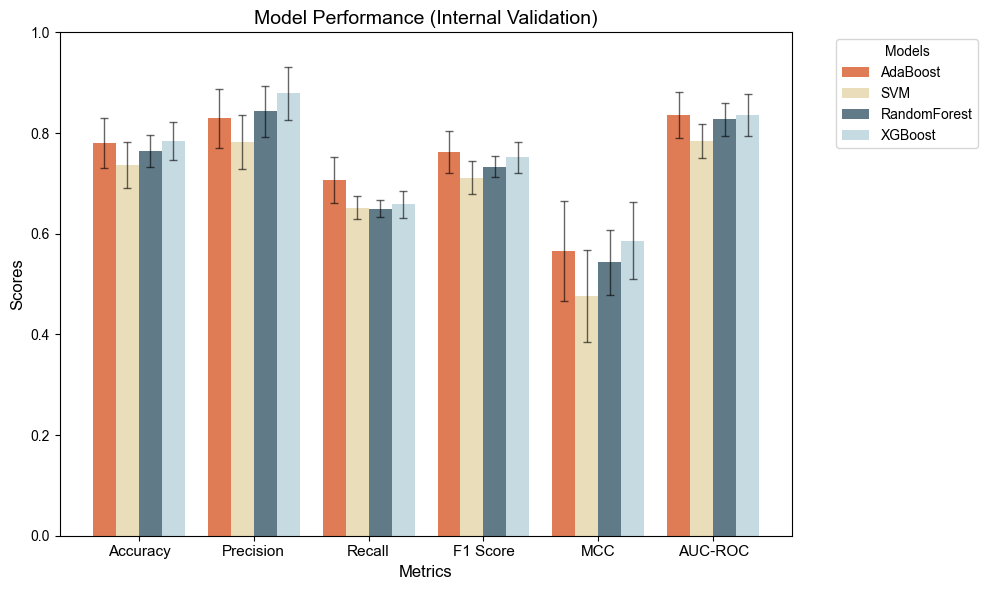

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
data = {
    "Model": ["AdaBoost", "AdaBoost", "SVM", "SVM", "RandomForest", "RandomForest", "XGBoost", "XGBoost"],
    "Validation": [
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)"
    ],
    "Accuracy": [
        "0.780 ± 0.050", "0.753",
        "0.736 ± 0.046", "0.773",
        "0.765 ± 0.032", "0.851",
        "0.784 ± 0.038", "0.805"
    ],
    "Precision": [
        "0.829 ± 0.058", "0.714",
        "0.782 ± 0.053", "0.739",
        "0.843 ± 0.051", "0.875",
        "0.879 ± 0.053", "0.776"
    ],
    "Recall": [
        "0.706 ± 0.046", "0.844",
        "0.652 ± 0.022", "0.844",
        "0.650 ± 0.016", "0.818",
        "0.658 ± 0.026", "0.857"
    ],
    "F1 Score": [
        "0.762 ± 0.042", "0.774",
        "0.711 ± 0.033", "0.788",
        "0.733 ± 0.021", "0.846",
        "0.752 ± 0.031", "0.815"
    ],
    "MCC": [
        "0.566 ± 0.099", "0.515",
        "0.476 ± 0.091", "0.551",
        "0.543 ± 0.065", "0.703",
        "0.586 ± 0.076", "0.614"
    ],
    "AUC-ROC": [
        "0.836 ± 0.045", "0.885",
        "0.784 ± 0.033", "0.877",
        "0.827 ± 0.033", "0.885",
        "0.836 ± 0.042", "0.861"
    ]
}

# Create the DataFrame
results_df = pd.DataFrame(data)

# Filter for internal validation results only
internal_df = results_df[results_df["Validation"] == "Internal (Cross-Validation)"].copy()

# Function to extract mean and SD
def extract_mean_sd(metric_series):
    means = []
    sds = []
    for val in metric_series:
        mean, sd = val.split(" ± ")
        means.append(float(mean))
        sds.append(float(sd))
    return np.array(means), np.array(sds)

# Metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "MCC", "AUC-ROC"]
models = internal_df["Model"].unique()

# Define a high-contrast color palette
colors = ['#dd6e42', '#e8dab2', '#4f6d7a', '#c0d6df']

# Set font to Arial, which is commonly used in IEEE publications
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10  # Set a general font size

# Initialize plot
x = np.arange(len(metrics))  # Label locations
width = 0.2  # Width of the bars

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model
for i, model in enumerate(models):
    means, sds = extract_mean_sd(internal_df[internal_df["Model"] == model][metrics].values.flatten())
    ax.bar(x + i*width, means, width, yerr=sds, capsize=3, label=model, alpha=0.9, color=colors[i], 
           error_kw={'elinewidth': 1, 'alpha': 0.6})  # Lighter error bars

# Add labels, title, and legend
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Performance (Internal Validation)', fontsize=14)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=11)

# Move the legend outside the plot
ax.legend(title="Models", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis limit to ensure clarity
ax.set_ylim([0, 1])

# Remove grid
ax.grid(False)

# Save the internal validation plot as a PNG file
plt.tight_layout()
plt.savefig('internal_validation_performance.png', dpi=300, bbox_inches='tight')  # 300 DPI is good for publications
plt.show()


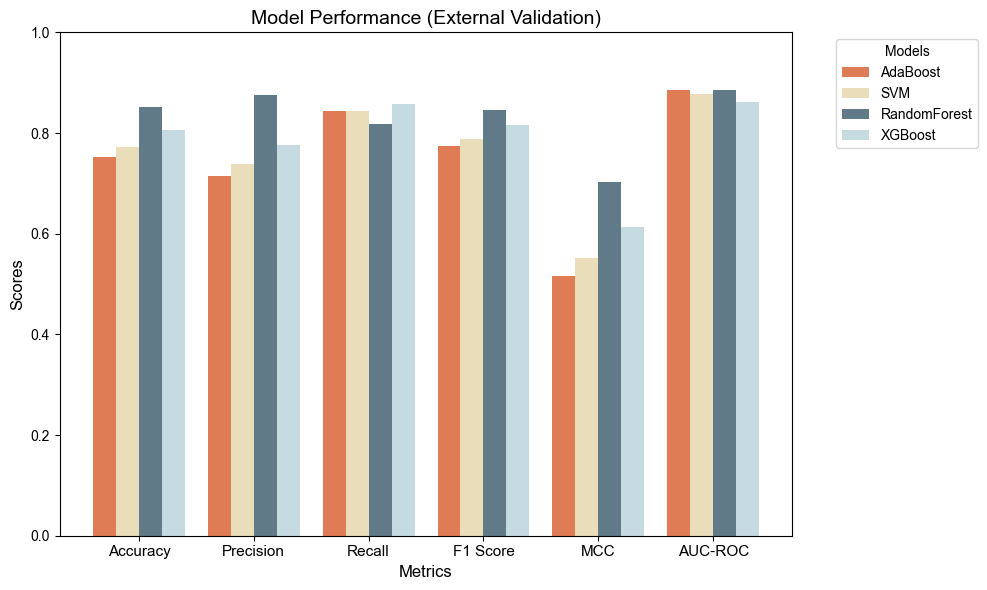

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
data = {
    "Model": ["AdaBoost", "AdaBoost", "SVM", "SVM", "RandomForest", "RandomForest", "XGBoost", "XGBoost"],
    "Validation": [
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)",
        "Internal (Cross-Validation)", "External (Test Set)"
    ],
    "Accuracy": [
        "0.780 ± 0.050", "0.753",
        "0.736 ± 0.046", "0.773",
        "0.765 ± 0.032", "0.851",
        "0.784 ± 0.038", "0.805"
    ],
    "Precision": [
        "0.829 ± 0.058", "0.714",
        "0.782 ± 0.053", "0.739",
        "0.843 ± 0.051", "0.875",
        "0.879 ± 0.053", "0.776"
    ],
    "Recall": [
        "0.706 ± 0.046", "0.844",
        "0.652 ± 0.022", "0.844",
        "0.650 ± 0.016", "0.818",
        "0.658 ± 0.026", "0.857"
    ],
    "F1 Score": [
        "0.762 ± 0.042", "0.774",
        "0.711 ± 0.033", "0.788",
        "0.733 ± 0.021", "0.846",
        "0.752 ± 0.031", "0.815"
    ],
    "MCC": [
        "0.566 ± 0.099", "0.515",
        "0.476 ± 0.091", "0.551",
        "0.543 ± 0.065", "0.703",
        "0.586 ± 0.076", "0.614"
    ],
    "AUC-ROC": [
        "0.836 ± 0.045", "0.885",
        "0.784 ± 0.033", "0.877",
        "0.827 ± 0.033", "0.885",
        "0.836 ± 0.042", "0.861"
    ]
}

# Create the DataFrame
results_df = pd.DataFrame(data)

# Filter for external validation results only
external_df = results_df[results_df["Validation"] == "External (Test Set)"].copy()

# Function to extract mean and SD (for external validation we only have means)
def extract_means(metric_series):
    means = []
    for val in metric_series:
        means.append(float(val))  # Directly extract the value since no SD is given for external validation
    return np.array(means)

# Metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "MCC", "AUC-ROC"]
models = external_df["Model"].unique()

# Define a high-contrast color palette
colors = ['#dd6e42', '#e8dab2', '#4f6d7a', '#c0d6df']

# Set font to Arial, which is commonly used in IEEE publications
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10  # Set a general font size

# Initialize plot
x = np.arange(len(metrics))  # Label locations
width = 0.2  # Width of the bars

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model (no SD for external validation)
for i, model in enumerate(models):
    means = extract_means(external_df[external_df["Model"] == model][metrics].values.flatten())
    ax.bar(x + i*width, means, width, label=model, alpha=0.9, color=colors[i])

# Add labels, title, and legend
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Performance (External Validation)', fontsize=14)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=11)

# Move the legend outside the plot
ax.legend(title="Models", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis limit to ensure clarity
ax.set_ylim([0, 1])

# Remove grid
ax.grid(False)

# Show plot with tighter layout
plt.tight_layout()
plt.savefig('external_validation_performance.png', dpi=300, bbox_inches='tight')  # 300 DPI is good for publications
plt.show()

